# Увеличение покупательской активности постоянных клиентов сервиса "В один клик"  


Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. «В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Как решать задачу:**

Для выполнения задачи необходимо пройти следуюшие этапы:

1) Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

    В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый  
покупатель приносил компании за последние три месяца.

    Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Цель исследования**

Целью исследования является сегментация покупателей и разработка персонализированных предложений для них.

**Описание данных**

market_file.csv Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  


market_money.csv Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.  


market_time.csv Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.  


money.csv Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.  


**Ход исследования**

Исследование пройдёт в девять этапов:

- Загрузка данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Объединение таблиц.
- Корреляционный анализ.
- Использование пайплайнов.
- Анализ важности признаков.
- Сегментация покупателей.
- Итоговые выводы.

### Импорт библиотек, стилизация графиков и применение константы и загрузка данных

#### Импорт библиотек

In [1]:
!pip install -q imblearn
!pip install -q phik
!pip install -Uq scikit-learn
!pip install -q shap
!pip install -q optuna
!pip install -q optuna.integration

In [2]:
import pandas as pd
# import optuna
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from cycler import cycler
import seaborn as sns

import numpy as np
from scipy import stats as st
import phik

from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTENC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, f1_score

from optuna import distributions
from optuna.integration import OptunaSearchCV

from sklearn.inspection import permutation_importance
import shap

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

#### Стилизуем графики

In [3]:
colors = ['darkturquoise', '#FFB5B8', '#8EBA42', '#FBC15E', '#777777', '#988ED5', '#348ABD', '#E24A33']

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
mpl.style.use(['ggplot'])
mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

#### Примененение константы

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

#### Загружаем данные

In [5]:
import os

pth1 = '/datasets/market_file.csv'
pth2 = '/datasets/market_money.csv'
pth3 = '/datasets/market_time.csv'
pth4 = '/datasets/money.csv'
if os.path.exists(pth1):
    market_customer_df = pd.read_csv(pth1)
    market_money_df = pd.read_csv(pth2)
    market_time_df = pd.read_csv(pth3)
    money_df = pd.read_csv(pth4, sep=';', decimal=',')
else:
    print('Something is wrong')

In [6]:
# Напишем функцию для получения общей информации о датасете
def get_info(data):
    display(data.head())
    display(data.info())
    display(data.describe().T)
    print('Кол-во явных дубликатов:', data.duplicated().sum())
    print('Кол-во пропусков:\n', data.isna().sum())

In [7]:
get_info(market_customer_df)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


Кол-во явных дубликатов: 0
Кол-во пропусков:
 id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


In [8]:
get_info(market_money_df)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


Кол-во явных дубликатов: 0
Кол-во пропусков:
 id         0
Период     0
Выручка    0
dtype: int64


In [9]:
get_info(market_time_df)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


Кол-во явных дубликатов: 0
Кол-во пропусков:
 id        0
Период    0
минут     0
dtype: int64


In [10]:
get_info(money_df)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


Кол-во явных дубликатов: 0
Кол-во пропусков:
 id         0
Прибыль    0
dtype: int64


**Вывод**  

- Датасеты market_customer_df и market_money_df выглядят правдоподобно  

- Датасет market_time_df-Количество минут на сайте выглядит очень небольшим, но, возможно, такова специфика сайта  

- Датасет money_df прибыль выглядит очень малой по сравнению с выручкой в таблице market_money_df,возможно, на это влияет тот факт, что прибыль предоставляется за 3 месяца, а выручка - за все время. Кроме того, прибыль считается как выручка за вычетом себестоимости и сопутствующих расходов. Тем не менее, нужно будет проверить порядок чисел.  

Кол-во явных дубликатов и пропусков отсутствует, типы данных соответствуют описаниям.   


Предоставленные данные соответствуют описанию. Единственное: правдоподобность некоторых значений необходимо будет проверить в процессе анализа.


### Предобработка данных

#### Переименуем столбцы в таблицах для удобства

**market_customer_df**

In [11]:
# выведем названия столбцов
market_customer_df.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [12]:
# напишем функцию, заменяющую нижние подчеркивания на пробелы и переводящую в нижний регистр строки в списке
def normalize_col_names(col_names):
    return [col.lower().replace('_', ' ') for col in col_names]

# проверяем результат
market_customer_df.columns = normalize_col_names(market_customer_df.columns)
market_customer_df.columns

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет актив 6 мес', 'маркет актив тек мес', 'длительность',
       'акционные покупки', 'популярная категория',
       'средний просмотр категорий за визит',
       'неоплаченные продукты штук квартал', 'ошибка сервиса',
       'страниц за визит'],
      dtype='object')

**market_money_df**

In [13]:
# выведем названия столбцов
market_money_df.columns

Index(['id', 'Период', 'Выручка'], dtype='object')

In [14]:
# применим функцию выше
market_money_df.columns = normalize_col_names(market_money_df.columns)
market_money_df.columns

Index(['id', 'период', 'выручка'], dtype='object')

**market_time_df**

In [15]:
# выведем названия столбцов
market_time_df.columns

Index(['id', 'Период', 'минут'], dtype='object')

In [16]:
# применим функцию
market_time_df.columns = normalize_col_names(market_time_df.columns)
market_time_df.columns

Index(['id', 'период', 'минут'], dtype='object')

**money_df**

In [17]:
# выведем названия столбцов
money_df.columns

Index(['id', 'Прибыль'], dtype='object')

In [18]:
# применим функцию
money_df.columns = normalize_col_names(money_df.columns)
money_df.columns

Index(['id', 'прибыль'], dtype='object')

#### Обработка неявных дубликатов

**market_customer_df**

In [19]:
# Выбор столбцов с типом данных object
object_columns = market_customer_df.select_dtypes(include=['object']).columns

# Вывод уникальных значений для каждого столбца с типом object
for column in object_columns:
    unique_values = market_customer_df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'покупательская активность':
['Снизилась' 'Прежний уровень']

Уникальные значения в столбце 'тип сервиса':
['премиум' 'стандартт' 'стандарт']

Уникальные значения в столбце 'разрешить сообщать':
['да' 'нет']

Уникальные значения в столбце 'популярная категория':
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



Видим дубликат в столбце "тип сервиса" а также ошибку в столбце "популярная категория- аксесуары" устраним ошибки и приведем значения к нижнему регистру:

In [20]:
# приводим значения в нижний регистр
market_customer_df['покупательская активность'] = market_customer_df['покупательская активность'].apply(lambda x : x.lower())

# удаляем дубликат
market_customer_df['тип сервиса'] = market_customer_df['тип сервиса'].replace('стандартт', 'стандарт')

#устраняем ошибку
market_customer_df['популярная категория'] = market_customer_df['популярная категория'].apply(lambda x : x.replace('аксесуары', 'аксессуары'))

# приводим значения в нижний регистр
market_customer_df['популярная категория'] = market_customer_df['популярная категория'].apply(lambda x : x.lower())

Проверяем значения

In [21]:
# Выбор столбцов с типом данных object
object_columns = market_customer_df.select_dtypes(include=['object']).columns

# Вывод уникальных значений для каждого столбца с типом object
for column in object_columns:
    unique_values = market_customer_df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'покупательская активность':
['снизилась' 'прежний уровень']

Уникальные значения в столбце 'тип сервиса':
['премиум' 'стандарт']

Уникальные значения в столбце 'разрешить сообщать':
['да' 'нет']

Уникальные значения в столбце 'популярная категория':
['товары для детей' 'домашний текстиль' 'косметика и аксессуары'
 'техника для красоты и здоровья' 'кухонная посуда'
 'мелкая бытовая техника и электроника']



Датасет обработан

**market_money_df**

In [22]:
# Выбор столбцов с типом данных object
object_columns = market_money_df.select_dtypes(include=['object']).columns

# Вывод уникальных значений для каждого столбца с типом object
for column in object_columns:
    unique_values = market_money_df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'период':
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']



Неявных дубликатов нет, заменим подчеркивания на пробелы:

In [23]:
market_money_df['период'] = market_money_df['период'].apply(lambda x : x.replace('_', ' '))
market_money_df['период'].unique()

array(['препредыдущий месяц', 'текущий месяц', 'предыдущий месяц'],
      dtype=object)

Датасет обработан

**market_time_df**

In [24]:
# Выбор столбцов с типом данных object
object_columns = market_time_df.select_dtypes(include=['object']).columns

# Вывод уникальных значений для каждого столбца с типом object
for column in object_columns:
    unique_values = market_time_df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'период':
['текущий_месяц' 'предыдцщий_месяц']



Неявных дубликатов нет,однако есть ошибка в значении "предыдущий месяц". Исправим ошибку и заменим подчеркивания на пробелы:

In [25]:
# исправляем ошибку 
market_time_df['период'] = market_time_df['период'].apply(lambda x : x.replace('предыдцщий', 'предыдущий'))

# корректируем значения
market_time_df['период'] = market_time_df['период'].apply(lambda x : x.replace('_', ' '))

In [26]:
# Выбор столбцов с типом данных object
object_columns = market_time_df.select_dtypes(include=['object']).columns

# Вывод уникальных значений для каждого столбца с типом object
for column in object_columns:
    unique_values = market_time_df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'период':
['текущий месяц' 'предыдущий месяц']



Датасет обработан

**money_df**

In [27]:
# Выбор столбцов с типом данных object
object_columns = money_df.select_dtypes(include=['object']).columns

# Вывод уникальных значений для каждого столбца с типом object
for column in object_columns:
    unique_values = money_df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Строковых категориальных столбцов не наблюдается, поэтому неявные дубликаты обрабатывать негде.

**Вывод**  


Данные оказались достаточно чистыми, но с некоторыми неявными дубликатами и орфографическими ошибками. Все шероховатости и недостатки данных были исправлены.

### Исследовательский анализ данных

#### Проведем анализ количественных признаков для поиска и возможного устранения аномалий и выбросов.

**market_customer_df**

In [28]:
display(market_customer_df.head(5))
market_customer_df.describe()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


,id,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Изучим количественные признаки:

*****маркет актив 6 мес*****

In [29]:
market_customer_df['маркет актив 6 мес'].sort_values(ascending=False)

1141    6.6
506     6.6
932     6.6
1273    6.6
692     6.6
       ... 
357     0.9
1287    0.9
164     0.9
389     0.9
147     0.9
Name: маркет актив 6 мес, Length: 1300, dtype: float64

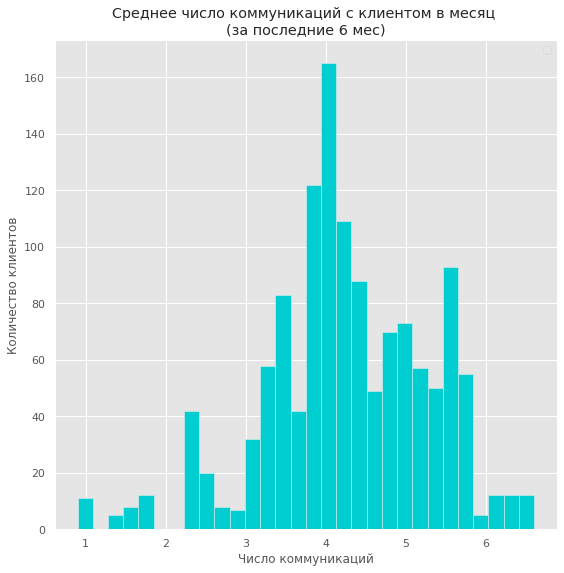

In [30]:
market_customer_df['маркет актив 6 мес'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Среднее число коммуникаций с клиентом в месяц \n(за последние 6 мес)')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Число коммуникаций')
plt.show()

Видим аналогию на нормальное распределение со сдвигом вправо. Что-то еще о таком распределении сказать сложно. Построим боксплот:

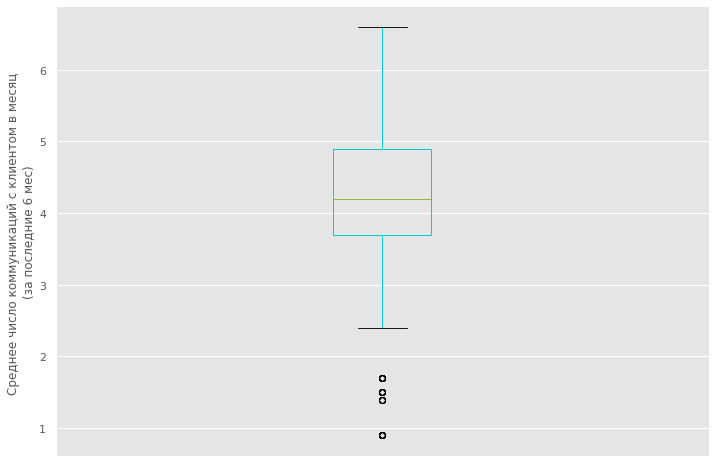

In [31]:
market_customer_df.boxplot('маркет актив 6 мес')
plt.ylabel('Среднее число коммуникаций с клиентом в месяц \n(за последние 6 мес)')
plt.xticks([])
plt.show()

Видим, что некоторое количество значений явно уходит за пределы первого квантиля. Попробуем поступить следующим образом: сделаем из этого количественного признака два категориальных:

* маркет актив 6 мес категориальный (2,6) - будет иметь значения низкий, средний, высокий при маркет актив 6 мес меньше 2, от 2 до 6, выше 6 (соответственно),
* маркет актив 6 мес категориальный (3,6)- будет иметь значения низкий, средний, высокий при маркет актив 6 мес меньше 3, от 3 до 6, выше 6 (соответственно).  


Из трех получившихся признаков при корреляционном анализе данных выкинем наименее полезные:

In [32]:
market_customer_df['маркет актив 6 мес категориальный (2,6)'] = market_customer_df['маркет актив 6 мес'].apply(
    lambda x : 'низкий' if x < 2 else 'средний' if x <= 6 else 'высокий'
)
market_customer_df['маркет актив 6 мес категориальный (3,6)'] = market_customer_df['маркет актив 6 мес'].apply(
    lambda x : 'низкий' if x < 3 else 'средний' if x <= 6 else 'высокий'
)

Построим графики признаков

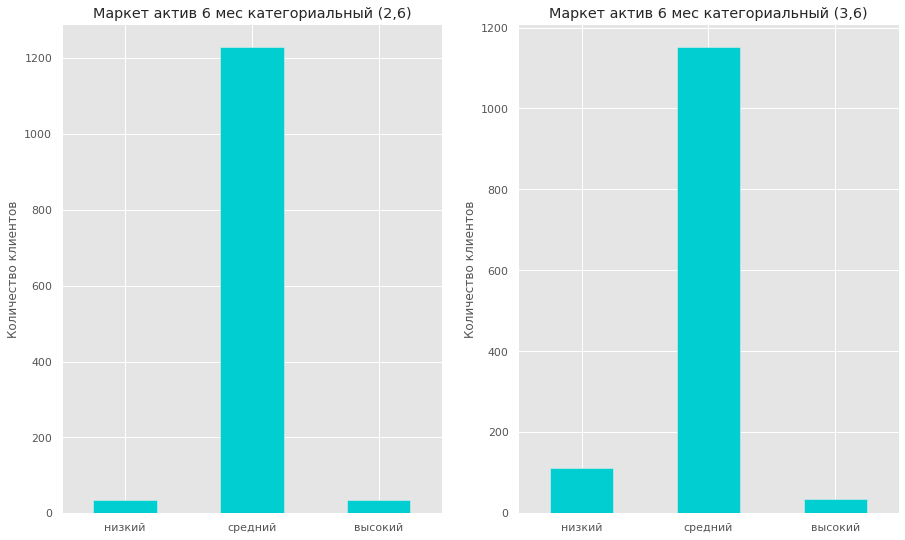

In [33]:
def get_greatness(val):
    indexers = {
        'низкий': 0,
        'средний': 1,
        'высокий': 2
    }
    return [indexers[idx] for idx in val]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_2_6 = market_customer_df.pivot_table(index='маркет актив 6 мес категориальный (2,6)', values='id', aggfunc='count')
cat_2_6.columns = ['count']
cat_2_6.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_2_6.plot.bar(ax=axes[0],
                 title='Маркет актив 6 мес категориальный (2,6)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

cat_3_6 = market_customer_df.pivot_table(index='маркет актив 6 мес категориальный (3,6)', values='id', aggfunc='count')
cat_3_6.columns = ['count']
cat_3_6.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_3_6.plot.bar(ax=axes[1],
                 title='Маркет актив 6 мес категориальный (3,6)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')
plt.show()

Наблюдается дисбаланс. Если один из получившихся категориальных признаков по результатам корреляционного анализа будет предпочтительнее количественного, учтем при обучении модели.

*****маркет актив тек мес*****

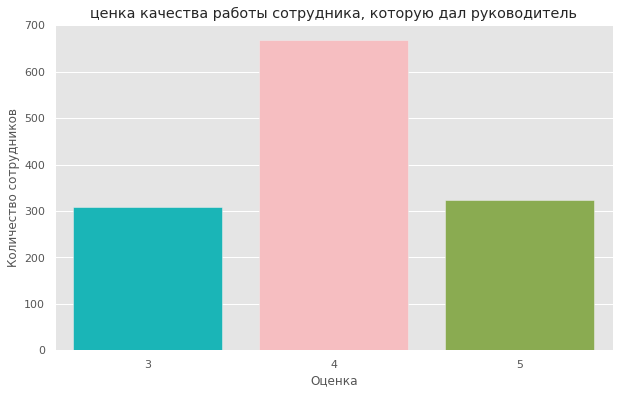

In [34]:
# Строим график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='маркет актив тек мес', data=market_customer_df)

# Добавляем заголовок и метки осей
plt.title('ценка качества работы сотрудника, которую дал руководитель')
plt.ylabel('Количество сотрудников')
plt.xlabel('Оценка')

# Отображаем график
plt.show()

Распределение неравномерное, при этом явно видим моду - 4 коммуникации).

Попробуем поступить следующим образом: сделаем из этого количественного признака категориальный:

маркет актив тек мес категориальный (3) - будет иметь значения низкий, средний, высокий при маркет актив тек мес меньше 3, от 3 до 4, выше 4 (соответственно)  

Из двух получившихся признаков при корреляционном анализе данных удалим наименее полезные:

In [35]:
market_customer_df['маркет актив тек мес категориальный (3,4,5)'] = market_customer_df['маркет актив тек мес'].apply(
    lambda x : 'низкий' if x < 3.5 else 'средний' if x <= 4.5 else 'высокий'
)

Заново построим график

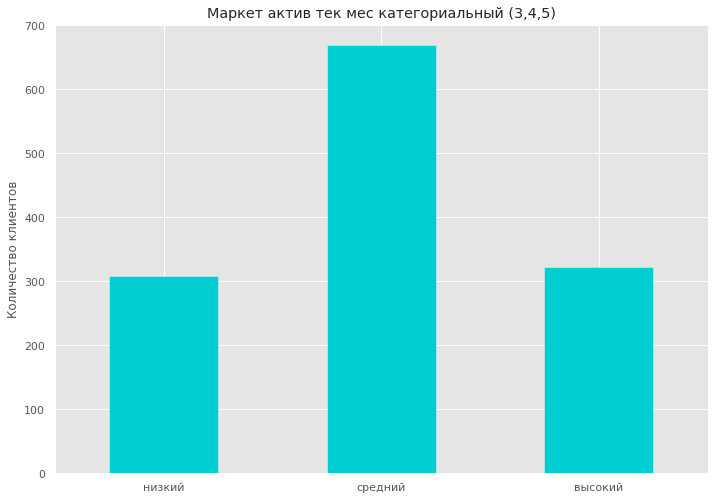

In [36]:
cat = market_customer_df.pivot_table(index='маркет актив тек мес категориальный (3,4,5)', values='id', aggfunc='count')
cat.columns = ['count']
cat.sort_index(key=get_greatness, ascending=True, inplace=True)

cat.plot.bar(title='Маркет актив тек мес категориальный (3,4,5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

plt.show()

*****длительность*****

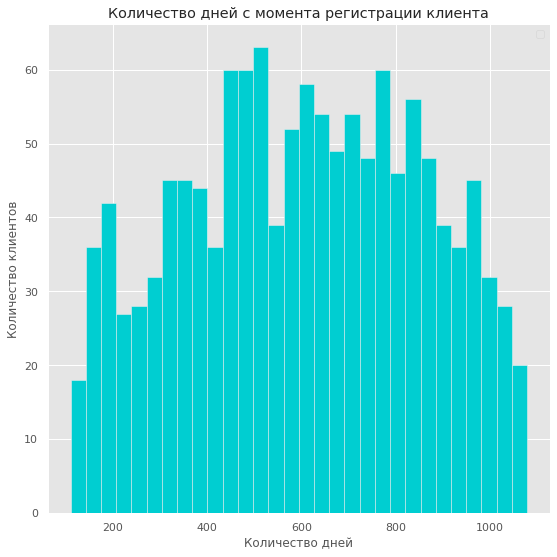

In [37]:
market_customer_df['длительность'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Количество дней с момента регистрации клиента')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество дней')
plt.show()

Распределение похоже на равномерное с небольшим подъемом к центру (скорее всего, на сайте каждый день регистрируется примерно одинаковое количество людей). Что-то еще о таком распределении сказать сложно. Построим боксплот:

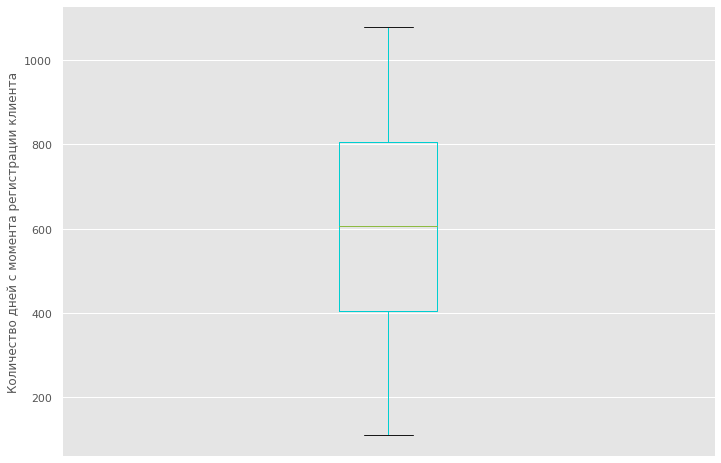

In [38]:
market_customer_df.boxplot('длительность')
plt.ylabel('Количество дней с момента регистрации клиента')
plt.xticks([])
plt.show()

Все значения находятся в пределах нормы. Возможно, во время подготовки данных к обучению удастся выловить нелинейную связь этого признака с целевым. Пока ничего больше о нем сказать нельзя.

*****акционные покупки*****

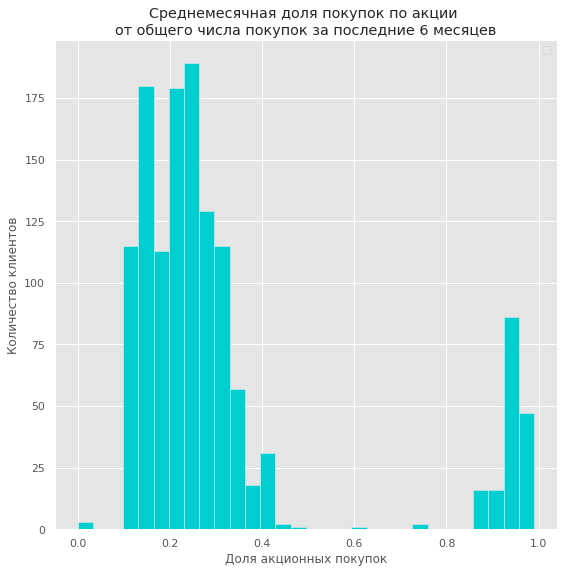

In [39]:
market_customer_df['акционные покупки'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Среднемесячная доля покупок по акции \nот общего числа покупок за последние 6 месяцев')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Доля акционных покупок')
plt.show()

Можем выделить категориальный признак с разделением в районе 0.7. Добавим этот признак:

In [40]:
market_customer_df['акционные покупки категориальный (0.7)'] = market_customer_df['акционные покупки'].apply(
    lambda x : 'низкий' if x < 0.7 else 'высокий'
)

Построим новый график:

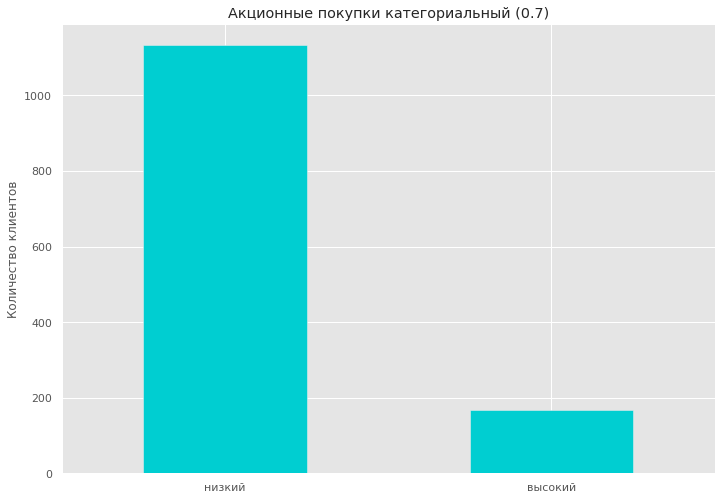

In [41]:
cat = market_customer_df.pivot_table(index='акционные покупки категориальный (0.7)', values='id', aggfunc='count')
cat.columns = ['count']
cat.sort_index(key=get_greatness, ascending=True, inplace=True)

cat.plot.bar(title='Акционные покупки категориальный (0.7)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

plt.show()

Наблюдаем большой дисбаланс классов, пока оставим как есть.

*****средний просмотр категорий за визит*****

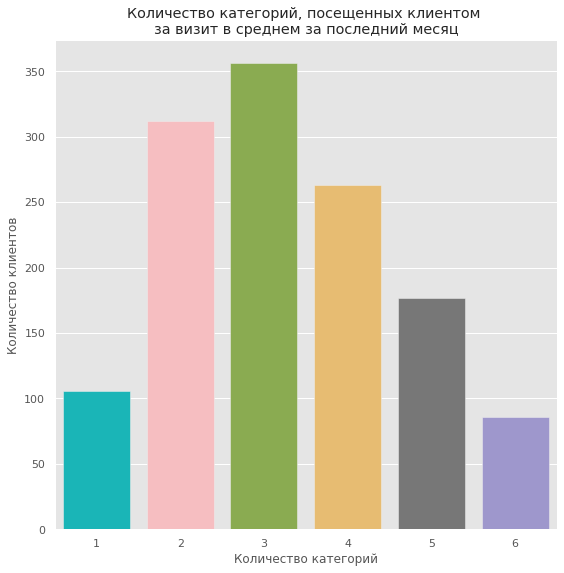

In [42]:
# Строим график с помощью seaborn
plt.figure(figsize=(9, 9))
sns.countplot(x='средний просмотр категорий за визит', data=market_customer_df)

# Добавляем заголовок и метки осей
plt.title('Количество категорий, посещенных клиентом \nза визит в среднем за последний месяц')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество категорий')

# Отображаем график
plt.show()

Наблюдаем пик значений в категории 3,минимальные у категории 1 и 6, построим боксплот:

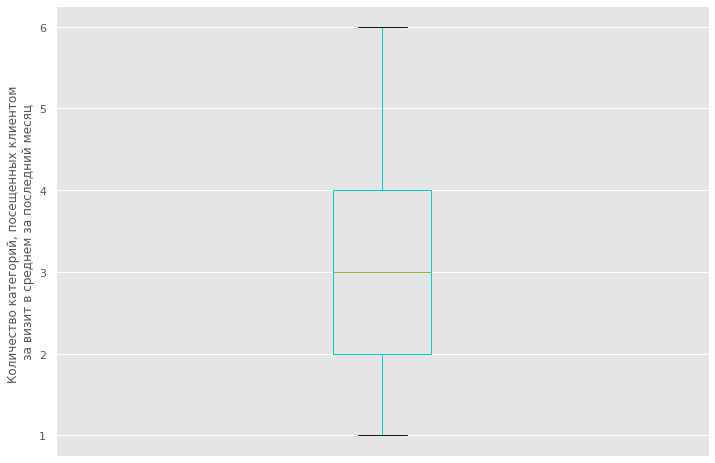

In [43]:
market_customer_df.boxplot('средний просмотр категорий за визит')
plt.ylabel('Количество категорий, посещенных клиентом \nза визит в среднем за последний месяц')
plt.xticks([])
plt.show()

Все значения в пределах нормы.

*****неоплаченные продукты штук квартал*****

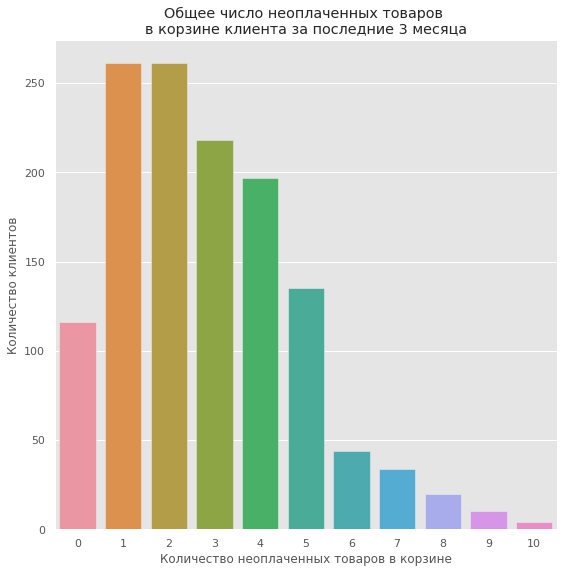

In [44]:
# Строим график с помощью seaborn
plt.figure(figsize=(9, 9))
sns.countplot(x='неоплаченные продукты штук квартал', data=market_customer_df)

# Добавляем заголовок и метки осей
plt.title('Общее число неоплаченных товаров \nв корзине клиента за последние 3 месяца')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество неоплаченных товаров в корзине')

# Отображаем график
plt.show()

Попробуем поступить следующим образом: сделаем из этого количественного признака два категориальных:

- неоплаченные продукты штук квартал категориальный (1,5) - будет иметь значения низкий, средний, высокий при неоплаченные продукты штук квартал меньше 1, от 1 до 5, выше 5 (соответственно),
- маркет актив 6 мес категориальный (5)- будет иметь значения низкий, высокий при неоплаченные продукты штук квартал меньше 5 и больше либо равно 5 (соответственно):

In [45]:
market_customer_df['неоплаченные продукты штук квартал категориальный (1,5)'] = market_customer_df['неоплаченные продукты штук квартал'].apply(
    lambda x : 'низкий' if x < 1 else 'средний' if x <= 5 else 'высокий'
)
market_customer_df['неоплаченные продукты штук квартал категориальный (5)'] = market_customer_df['неоплаченные продукты штук квартал'].apply(
    lambda x : 'низкий' if x <= 5 else 'высокий'
)

Построим графики с новыми признаками:

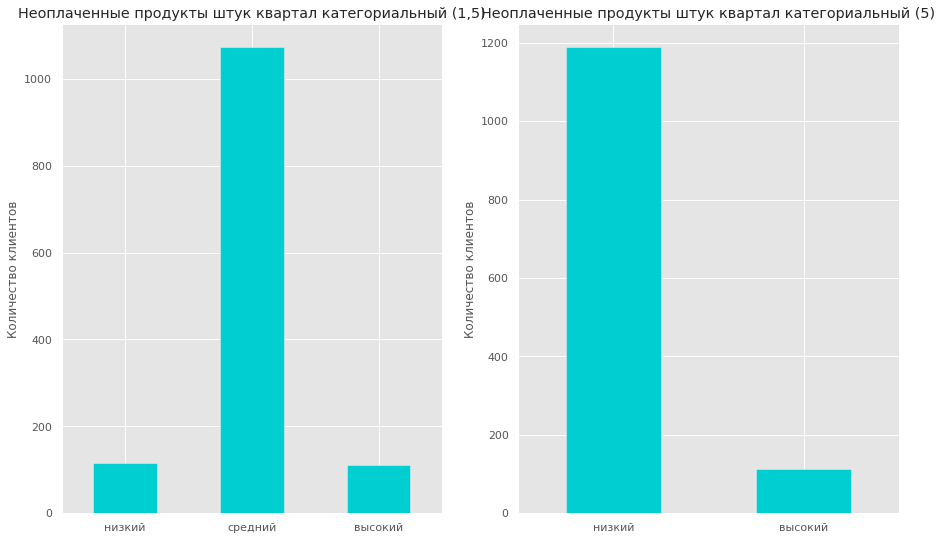

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_1_5 = market_customer_df.pivot_table(index='неоплаченные продукты штук квартал категориальный (1,5)', values='id', aggfunc='count')
cat_1_5.columns = ['count']
cat_1_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_1_5.plot.bar(ax=axes[0],
                 title='Неоплаченные продукты штук квартал категориальный (1,5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

cat_5 = market_customer_df.pivot_table(index='неоплаченные продукты штук квартал категориальный (5)', values='id', aggfunc='count')
cat_5.columns = ['count']
cat_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_5.plot.bar(ax=axes[1],
                 title='Неоплаченные продукты штук квартал категориальный (5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')
plt.show()

Наблюдаем сильный дисбаланс. Если один из получившихся категориальных признаков по результатам корреляционного анализа будет предпочтительнее количественного, необходимо будет это учесть при обучении модели.

*****ошибка сервиса*****

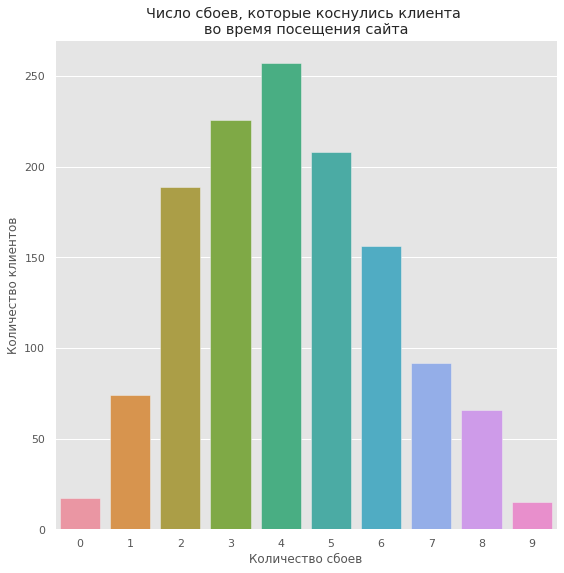

In [47]:
# Строим график с помощью seaborn
plt.figure(figsize=(9, 9))
sns.countplot(x='ошибка сервиса', data=market_customer_df)

# Добавляем заголовок и метки осей
plt.title('Число сбоев, которые коснулись клиента \nво время посещения сайта')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество сбоев')

# Отображаем график
plt.show()

Прослеживаются резкие сбои в районе 2 и 5.
Внесем новые признаки:

In [48]:
market_customer_df['ошибка сервиса категориальный (2,5)'] = market_customer_df['ошибка сервиса'].apply(
    lambda x : 'низкий' if x < 2 else 'средний' if x <= 5 else 'высокий'
)

# nакже вынесем признак, отделяющий только большие значения признака:
market_customer_df['ошибка сервиса категориальный (5)'] = market_customer_df['ошибка сервиса'].apply(
    lambda x : 'низкий' if x <= 5 else 'высокий'
)

Построим графики

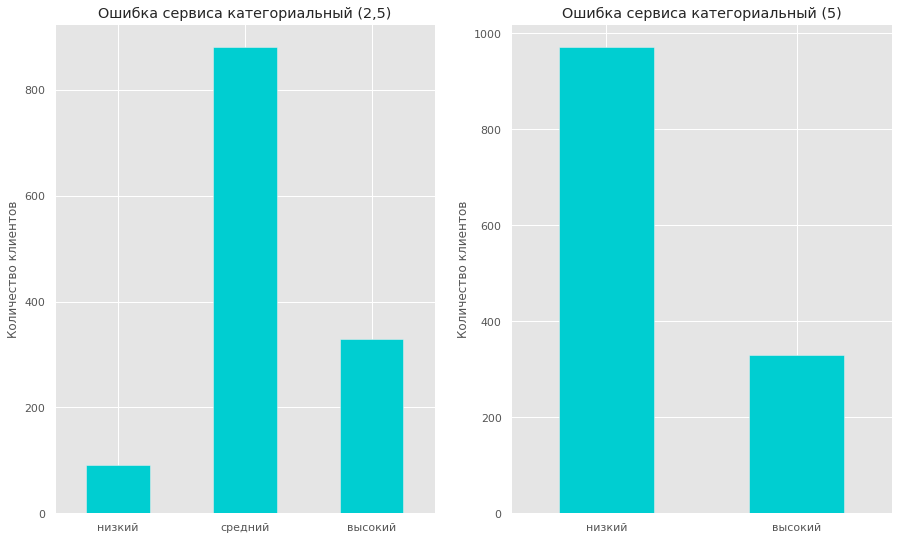

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_2_5 = market_customer_df.pivot_table(index='ошибка сервиса категориальный (2,5)', values='id', aggfunc='count')
cat_2_5.columns = ['count']
cat_2_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_2_5.plot.bar(ax=axes[0],
                 title='Ошибка сервиса категориальный (2,5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

cat_5 = market_customer_df.pivot_table(index='ошибка сервиса категориальный (5)', values='id', aggfunc='count')
cat_5.columns = ['count']
cat_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_5.plot.bar(ax=axes[1],
                 title='Ошибка сервиса категориальный (5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')
plt.show()

Оставим признаки в таблице. Может быть, они помогут с дальнейшим анализом.

*****страниц за визит*****

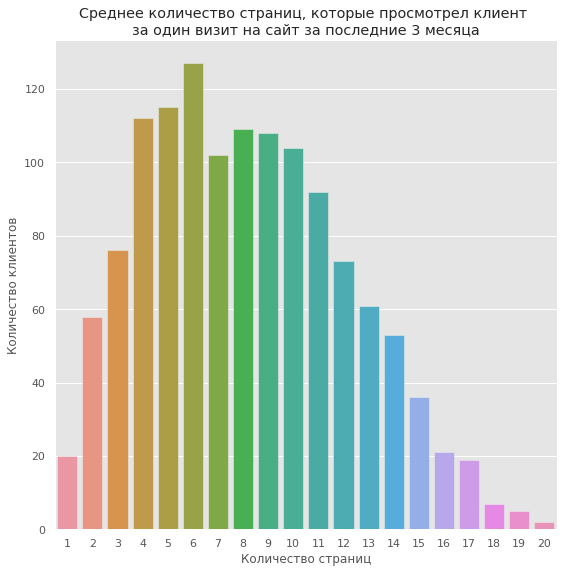

In [50]:
# Строим график с помощью seaborn
plt.figure(figsize=(9, 9))
sns.countplot(x='страниц за визит', data=market_customer_df)

# Добавляем заголовок и метки осей
plt.title('Среднее количество страниц, которые просмотрел клиент \nза один визит на сайт за последние 3 месяца')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество страниц')

# Отображаем график
plt.show()

В среднем от 100 до 120 клиентов просматривают от 4 до 10 страниц. Наиболее частое значение- 6 страниц. Как-либо обработать этот признак пока не получится, оставим его как есть.

**market_money_df**

In [51]:
display(market_money_df.head(5))
market_money_df.describe()

,id,период,выручка
0,215348,препредыдущий месяц,0.0
1,215348,текущий месяц,3293.1
2,215348,предыдущий месяц,0.0
3,215349,препредыдущий месяц,4472.0
4,215349,текущий месяц,4971.6


,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Количественным является "выручка". Проанализируем его.

Построим гистаграмму

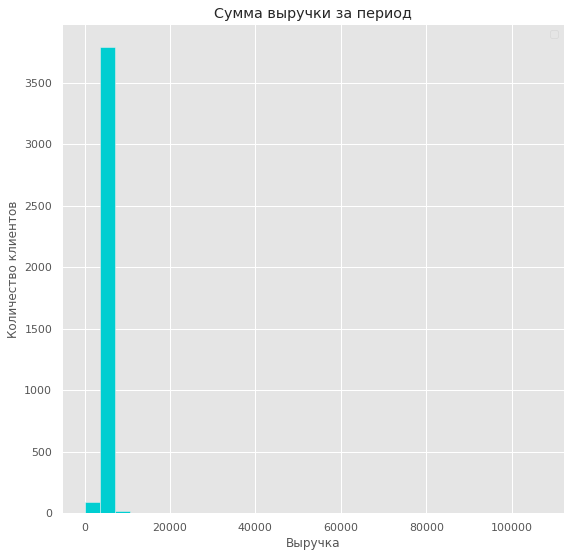

In [52]:
market_money_df['выручка'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Сумма выручки за период')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Выручка')
plt.show()

в значениях явно присутствуют аномальные значения, разберем поближе:

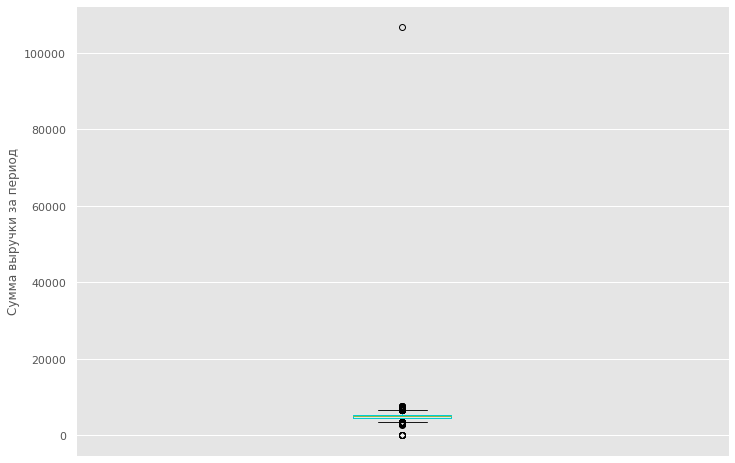

In [53]:
market_money_df.boxplot('выручка')
plt.ylabel('Cумма выручки за период')
plt.xticks([])
plt.show()

Наблюдаем аномальное значение больше 100000 при медиальном в 5000, удалим это значение.

In [54]:
market_money_df.query('выручка > 10000')

,id,период,выручка
98,215380,текущий месяц,106862.2


In [55]:
market_money_df = market_money_df.query('выручка < 100000')

Заново построим гистаграмму

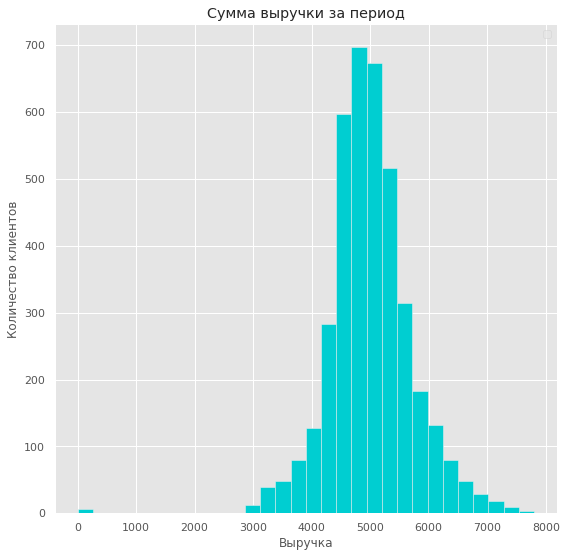

In [56]:
market_money_df.query('выручка < 100000')['выручка'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Сумма выручки за период')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Выручка')
plt.show()

Видим выбросы в районе 0. Но совершенно логично, что некоторые клиенты не совершали покупок в определенные периоды. Так что не будем трогать эти значения.

**market_time_df**

In [57]:
display(market_time_df.head(5))
market_time_df.describe()

,id,период,минут
0,215348,текущий месяц,14
1,215348,предыдущий месяц,13
2,215349,текущий месяц,10
3,215349,предыдущий месяц,12
4,215350,текущий месяц,13


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Количественным признаком является колонка "минут". По распределению видим, что средняя не отличается от медианы, но на всякий случай построим гистаграмму для полной картинки

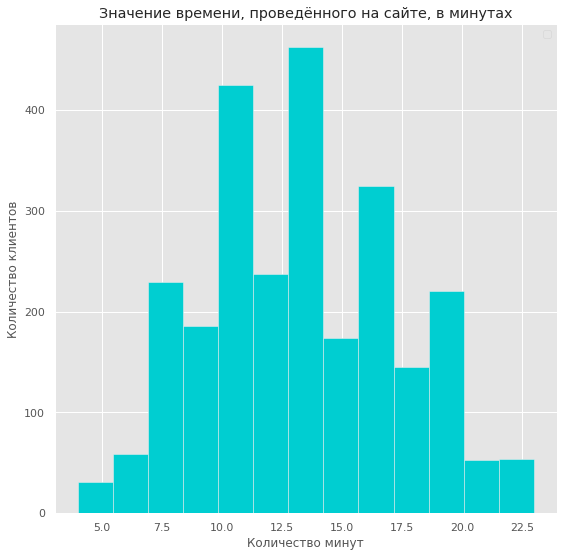

In [58]:
market_time_df['минут'].plot.hist(bins=13, figsize=(9, 9))
plt.title('Значение времени, проведённого на сайте, в минутах')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество минут')
plt.show()

наблюдаем пиковые значения в районе 11-14 минут

**money_df**

In [59]:
display(money_df.head(5))
money_df.describe()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Количественный признак "прибыль" показывает нормальное значение, средняя почти совпадает с медианой. Построим гистаграмму

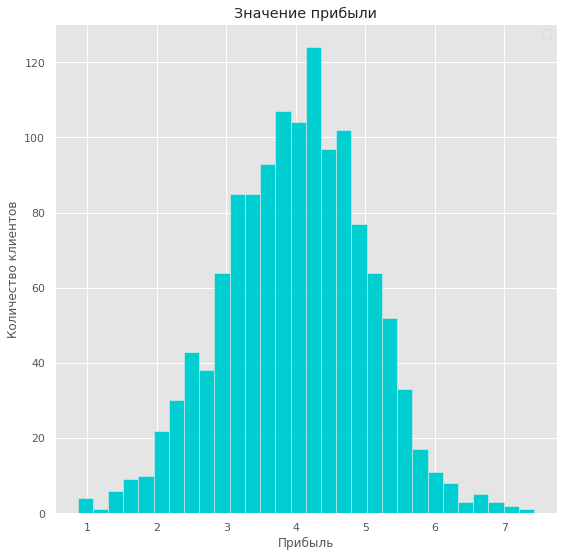

In [60]:
money_df['прибыль'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Значение прибыли')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Прибыль')
plt.show()

В среднем прибыль у значений от 3 до 5

#### Анализ категориальных признаков

**market_customer_df**

In [61]:
market_customer_df.head(1)

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,...,ошибка сервиса,страниц за визит,"маркет актив 6 мес категориальный (2,6)","маркет актив 6 мес категориальный (3,6)","маркет актив тек мес категориальный (3,4,5)",акционные покупки категориальный (0.7),"неоплаченные продукты штук квартал категориальный (1,5)",неоплаченные продукты штук квартал категориальный (5),"ошибка сервиса категориальный (2,5)",ошибка сервиса категориальный (5)
0,215348,снизилась,премиум,да,3.4,5,121,0.0,товары для детей,6,...,1,5,средний,средний,высокий,низкий,средний,низкий,низкий,низкий


Категориальными являются следующие признаки:

- покупательская активность (целевой);
- тип сервиса;
- разрешить сообщать;
- популярная категория.  


Напишем функцию для построения графика:

In [62]:
def show_bar(name, table, ax):
    pivot = table.pivot_table(index=name, values='id', aggfunc='count')
    pivot.columns = ['count']
    pivot.sort_values(by='count', ascending=True, inplace=True)

    return pivot.plot.bar(title=name,
                   legend='',
                   xlabel='',
                   ylabel='Количество пользователей',
                   rot=0,
                   ax=ax)

Построим графики категориальных признаков

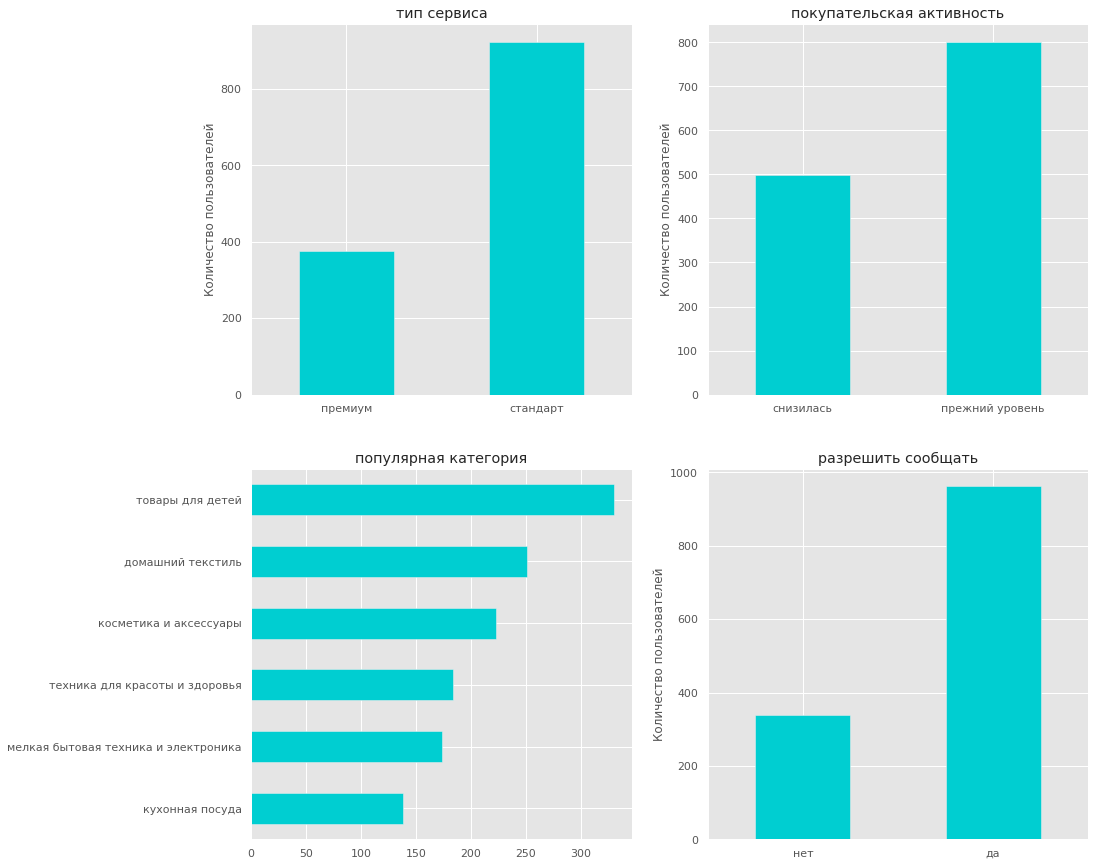

In [63]:
cat_col_names = ['покупательская активность',
                 'тип сервиса',
                 'разрешить сообщать']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i in range(0, 3):
    show_bar(cat_col_names[i], market_customer_df, axes[i // 2, 1 - i % 2])

pivot = market_customer_df.pivot_table(index='популярная категория', values='id', aggfunc='count')
pivot.columns = ['count']
pivot.sort_values(by='count', ascending=True, inplace=True)

pivot.plot.barh(title='популярная категория',
                legend='',
                xlabel='',
                ylabel='Количество пользователей',
                rot=0,
                ax=axes[1, 0])

plt.show()

Видим, что пользователи в основном разрешают сообщать об акциях, предпочитают домашний текстиль и товары для детей, пользуются стандартной версией сервиса. Главное, что можно вынести из графиков - необходимость обратить особое внимание на дисбаланс классов целевого признака (покупательская активность).

**market_money_df**

In [64]:
market_money_df.head(1)

,id,период,выручка
0,215348,препредыдущий месяц,0.0


Выведем график категориального признака

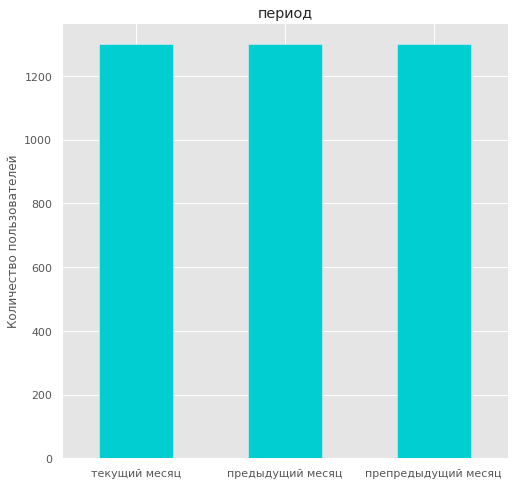

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
show_bar('период', market_money_df, axes)
plt.show()

ДИсбаланса нет, данные на одном уровне

**market_time_df**

In [66]:
market_time_df.head(1)

,id,период,минут
0,215348,текущий месяц,14


Категориальный график "период" рассмотрим его поближе. Построим диаграмму

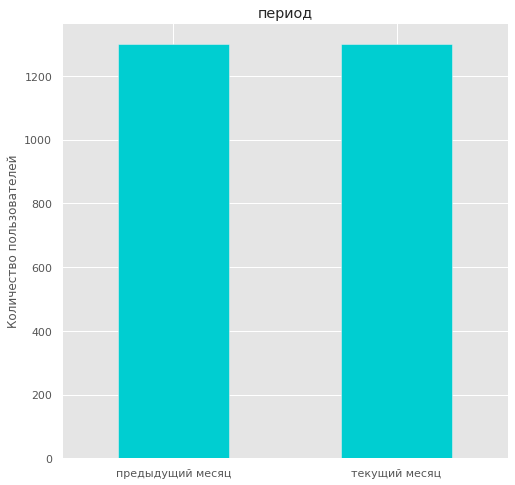

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
show_bar('период', market_time_df, axes)
plt.show()

Данные предоставлены за каждый месяц в одном и том же объеме.

**money_df**

In [68]:
money_df.head(1)

,id,прибыль
0,215348,0.98


Данный датасет не содержит пригодных для анализа категориальных признаков.

#### Отбор активных пользователей

Далее необходимо отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в каждый из месяцев. Для этого обратимся к датасету market_money_df: найдем в нем такие id пользователей, для которых произведение выручки за три месяца больше нуля (если результат равен нулю, то один из множителей - тоже):

In [69]:
active_users = market_money_df.groupby('id').prod().query('выручка > 0')
active_users.head()

,выручка
id,
215349,1.159673e+11
215350,1.332276e+11
215351,1.951079e+11
215352,1.566763e+11
215353,1.308332e+11


Отметим активными тех пользователей, id которых попал в получившуюся таблицу:

In [70]:
active_users_idx = list(active_users.index)
market_customer_df['активность за три месяца'] = market_customer_df['id'].apply(
    lambda x : 'да' if x in active_users_idx else 'нет'
)

In [71]:
market_customer_df.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,...,страниц за визит,"маркет актив 6 мес категориальный (2,6)","маркет актив 6 мес категориальный (3,6)","маркет актив тек мес категориальный (3,4,5)",акционные покупки категориальный (0.7),"неоплаченные продукты штук квартал категориальный (1,5)",неоплаченные продукты штук квартал категориальный (5),"ошибка сервиса категориальный (2,5)",ошибка сервиса категориальный (5),активность за три месяца
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,...,5,средний,средний,высокий,низкий,средний,низкий,низкий,низкий,нет
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,5,средний,средний,средний,высокий,средний,низкий,средний,низкий,да
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,5,средний,средний,низкий,низкий,средний,низкий,низкий,низкий,да
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,4,средний,средний,высокий,высокий,низкий,низкий,высокий,высокий,да
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,2,средний,средний,низкий,высокий,средний,низкий,средний,низкий,да


Проверим количество неактивных пользователей:

In [72]:
market_customer_df[market_customer_df['активность за три месяца'] == 'нет']

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,...,страниц за визит,"маркет актив 6 мес категориальный (2,6)","маркет актив 6 мес категориальный (3,6)","маркет актив тек мес категориальный (3,4,5)",акционные покупки категориальный (0.7),"неоплаченные продукты штук квартал категориальный (1,5)",неоплаченные продукты штук квартал категориальный (5),"ошибка сервиса категориальный (2,5)",ошибка сервиса категориальный (5),активность за три месяца
0,215348,снизилась,премиум,да,3.4,5,121,0.0,товары для детей,6,...,5,средний,средний,высокий,низкий,средний,низкий,низкий,низкий,нет
9,215357,снизилась,стандарт,да,3.9,5,154,0.0,техника для красоты и здоровья,3,...,5,средний,средний,высокий,низкий,средний,низкий,высокий,высокий,нет
11,215359,снизилась,стандарт,да,4.6,5,110,0.0,домашний текстиль,4,...,2,средний,средний,высокий,низкий,средний,низкий,средний,низкий,нет


Таких пользователей оказалось три. Удалим их и избавимся от столбца:

In [73]:
market_customer_df = market_customer_df[market_customer_df['активность за три месяца'] == 'да']
market_customer_df.drop('активность за три месяца', axis=1, inplace=True)
market_customer_df.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,...,ошибка сервиса,страниц за визит,"маркет актив 6 мес категориальный (2,6)","маркет актив 6 мес категориальный (3,6)","маркет актив тек мес категориальный (3,4,5)",акционные покупки категориальный (0.7),"неоплаченные продукты штук квартал категориальный (1,5)",неоплаченные продукты штук квартал категориальный (5),"ошибка сервиса категориальный (2,5)",ошибка сервиса категориальный (5)
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,2,5,средний,средний,средний,высокий,средний,низкий,средний,низкий
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,1,5,средний,средний,низкий,низкий,средний,низкий,низкий,низкий
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,6,4,средний,средний,высокий,высокий,низкий,низкий,высокий,высокий
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,3,2,средний,средний,низкий,высокий,средний,низкий,средний,низкий
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,...,1,4,средний,средний,средний,низкий,средний,низкий,низкий,низкий


**Вывод**  


В процессе исследовательского анализа данных в таблицы был добавлен ряд категориальных признаков. Кроме того, были удалены пользователи, история активности которых не насчитывает трех месяцев.

### Объединение таблиц

Сгруппируем таблицы market_time_df и market_money_df по периоду:

In [74]:
market_time_grouped_df = market_time_df.set_index(['id', 'период']).минут.unstack().add_prefix('минут ')
market_time_grouped_df.head()

период,минут предыдущий месяц,минут текущий месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [75]:
market_money_grouped_df = market_money_df.set_index(['id', 'период']).выручка.unstack().add_prefix('выручка ')
market_money_grouped_df.head()

период,выручка предыдущий месяц,выручка препредыдущий месяц,выручка текущий месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


Объединим таблицы с таблицей market_customer_df:

In [76]:
market_df = market_customer_df.join(
    market_time_grouped_df, on='id', how='left'
).join(
    market_money_grouped_df, on='id', how='left'
)
market_df.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,...,акционные покупки категориальный (0.7),"неоплаченные продукты штук квартал категориальный (1,5)",неоплаченные продукты штук квартал категориальный (5),"ошибка сервиса категориальный (2,5)",ошибка сервиса категориальный (5),минут предыдущий месяц,минут текущий месяц,выручка предыдущий месяц,выручка препредыдущий месяц,выручка текущий месяц
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,высокий,средний,низкий,средний,низкий,12,10,5216.0,4472.0,4971.6
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,низкий,средний,низкий,низкий,низкий,8,13,5457.5,4826.0,5058.4
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,высокий,низкий,низкий,высокий,высокий,11,13,6158.0,4793.0,6610.4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,высокий,средний,низкий,средний,низкий,8,11,5807.5,4594.0,5872.5
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,...,низкий,средний,низкий,низкий,низкий,10,10,4738.5,5124.0,5388.5


Проверим размерность:

In [77]:
print(market_customer_df.shape)
print(market_money_grouped_df.shape)
print(market_time_grouped_df.shape)
print(market_df.shape)

(1297, 21)
(1300, 3)
(1300, 2)
(1297, 26)


Количество строк везде совпадает, а количество столбцов в итоговой таблице равно сумме количеств столбцов смерженных таблиц.

Проверим пропуски в данных:

In [78]:
print(market_df.isna().sum())

id                                                         0
покупательская активность                                  0
тип сервиса                                                0
разрешить сообщать                                         0
маркет актив 6 мес                                         0
маркет актив тек мес                                       0
длительность                                               0
акционные покупки                                          0
популярная категория                                       0
средний просмотр категорий за визит                        0
неоплаченные продукты штук квартал                         0
ошибка сервиса                                             0
страниц за визит                                           0
маркет актив 6 мес категориальный (2,6)                    0
маркет актив 6 мес категориальный (3,6)                    0
маркет актив тек мес категориальный (3,4,5)                0
акционные покупки катего

Обнаружен один пропуск: для одного из клиентов не заполнена выручка за текущий месяц. Удалим его, так как скорее всего его активность на сайте меньше трех месяцев:

In [79]:
market_df = market_df.dropna()
print(market_df.isna().sum())

id                                                         0
покупательская активность                                  0
тип сервиса                                                0
разрешить сообщать                                         0
маркет актив 6 мес                                         0
маркет актив тек мес                                       0
длительность                                               0
акционные покупки                                          0
популярная категория                                       0
средний просмотр категорий за визит                        0
неоплаченные продукты штук квартал                         0
ошибка сервиса                                             0
страниц за визит                                           0
маркет актив 6 мес категориальный (2,6)                    0
маркет актив 6 мес категориальный (3,6)                    0
маркет актив тек мес категориальный (3,4,5)                0
акционные покупки катего

**Вывод**  


В процессе объединения таблиц был создан единый датасет для работы с информацией о пользователях на сайте.

### Корреляционный анализ

Построим матрицу корреляции между признаками:

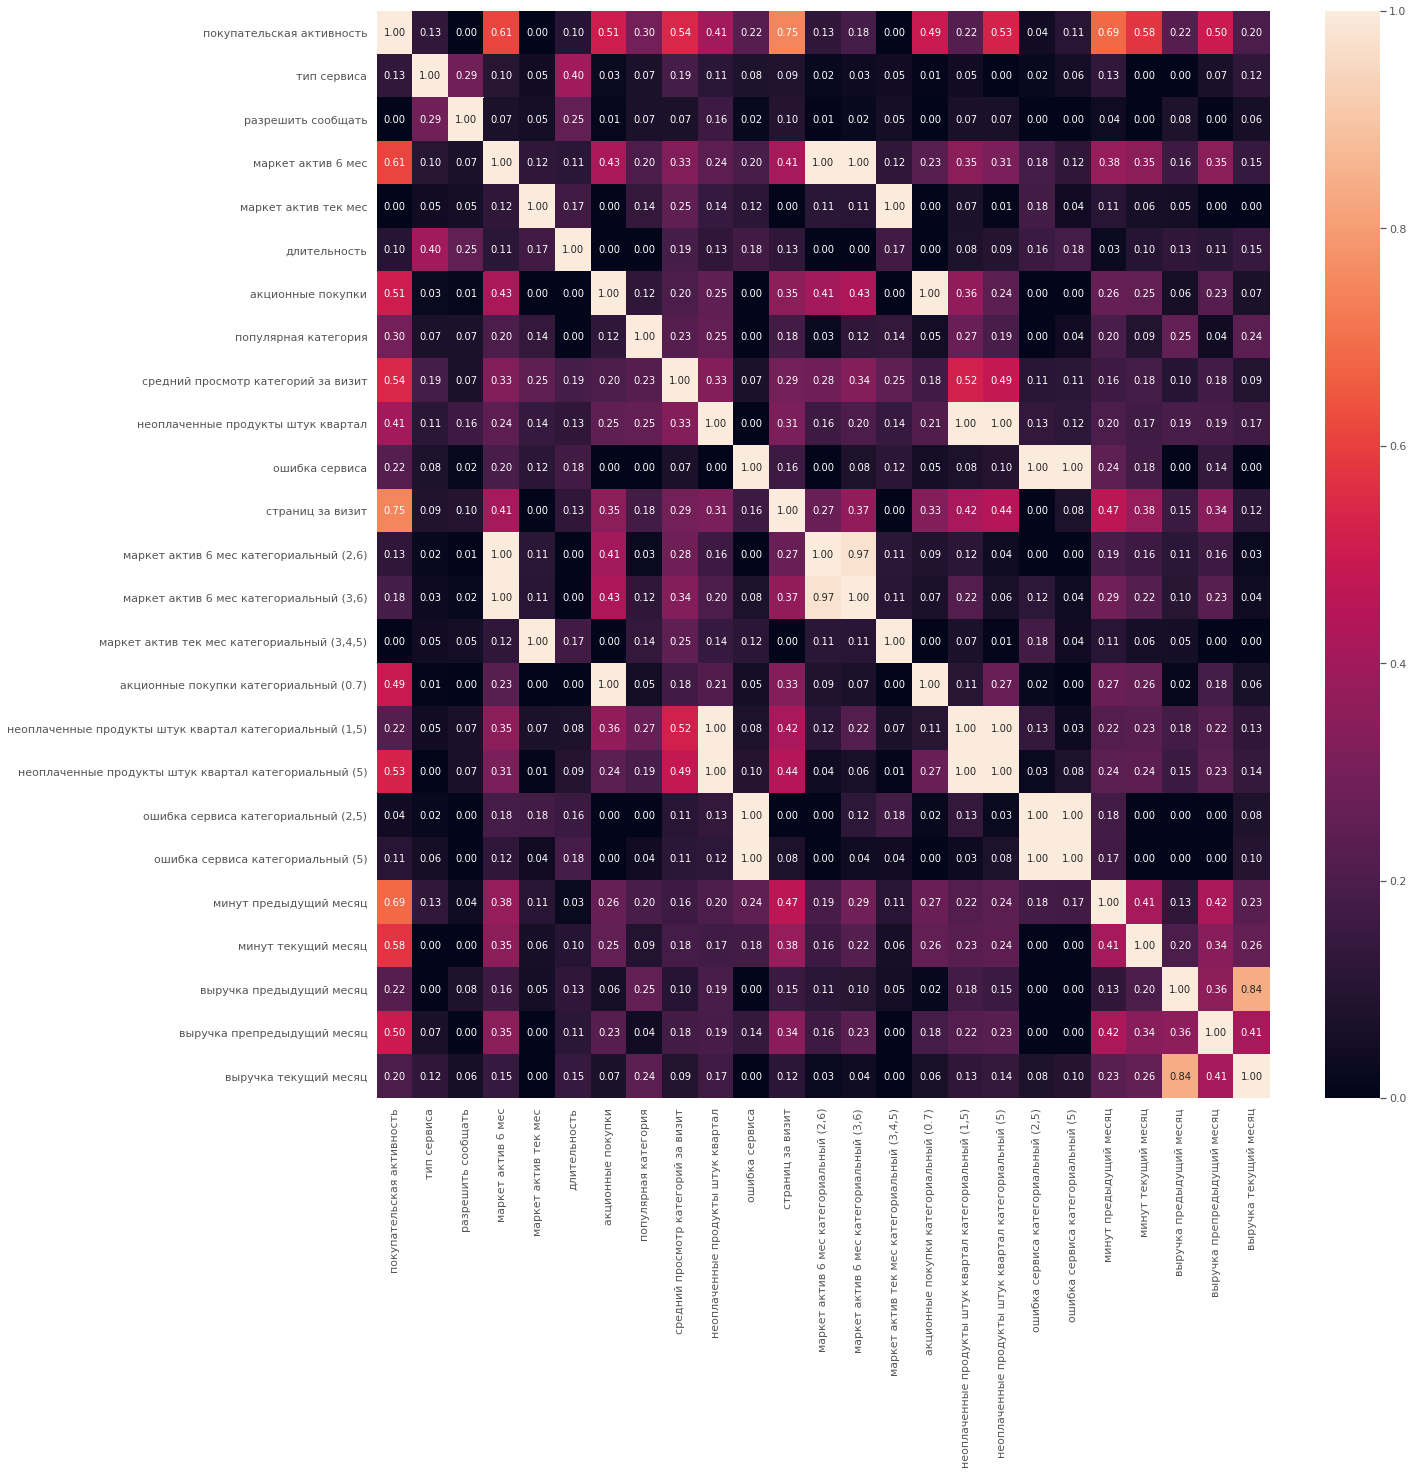

In [80]:
interval_cols = {
    'длительность',
    'акционные покупки',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка предыдущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'
}
plt.figure(figsize=(20, 20))

sns.heatmap(
    market_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Глядя на матрицу, можно увидеть, что линейно коррелирующими признаками являются следующие:  

    'маркет актив 6 мес',
    'акционные покупки',
    'популярная категория',
    'средний просмотр категорий за визит',
    'неоплаченные продукты штук квартал',
    'ошибка сервиса',
    'страниц за визит',
    'акционные покупки категориальный (0.7)',
    'неоплаченные продукты штук квартал категориальный (1,5)',
    'неоплаченные продукты штук квартал категориальный (5)',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'

Удалим из таблицы некоррелирующие и слабокоррелирующие признаки:

In [81]:
linear_corr_cols = [
    'маркет актив 6 мес',
    'акционные покупки',
    'популярная категория',
    'средний просмотр категорий за визит',
    'неоплаченные продукты штук квартал',
    'ошибка сервиса',
    'страниц за визит',
    'акционные покупки категориальный (0.7)',
    'неоплаченные продукты штук квартал категориальный (1,5)',
    'неоплаченные продукты штук квартал категориальный (5)',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'
]

In [82]:
linear_corr_cols.insert(0, 'покупательская активность')
linear_corr_cols.insert(0, 'id')

In [83]:
market_corrected_df = market_df[linear_corr_cols]
market_corrected_df.head()

,id,покупательская активность,маркет актив 6 мес,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,акционные покупки категориальный (0.7),"неоплаченные продукты штук квартал категориальный (1,5)",неоплаченные продукты штук квартал категориальный (5),минут предыдущий месяц,минут текущий месяц,выручка препредыдущий месяц,выручка текущий месяц
1,215349,снизилась,4.4,0.75,товары для детей,4,4,2,5,высокий,средний,низкий,12,10,4472.0,4971.6
2,215350,снизилась,4.9,0.14,домашний текстиль,5,2,1,5,низкий,средний,низкий,8,13,4826.0,5058.4
3,215351,снизилась,3.2,0.99,товары для детей,5,0,6,4,высокий,низкий,низкий,11,13,4793.0,6610.4
4,215352,снизилась,5.1,0.94,товары для детей,3,2,3,2,высокий,средний,низкий,8,11,4594.0,5872.5
5,215353,снизилась,3.3,0.26,домашний текстиль,4,1,1,4,низкий,средний,низкий,10,10,5124.0,5388.5


Устранение мультиколлинеарности:

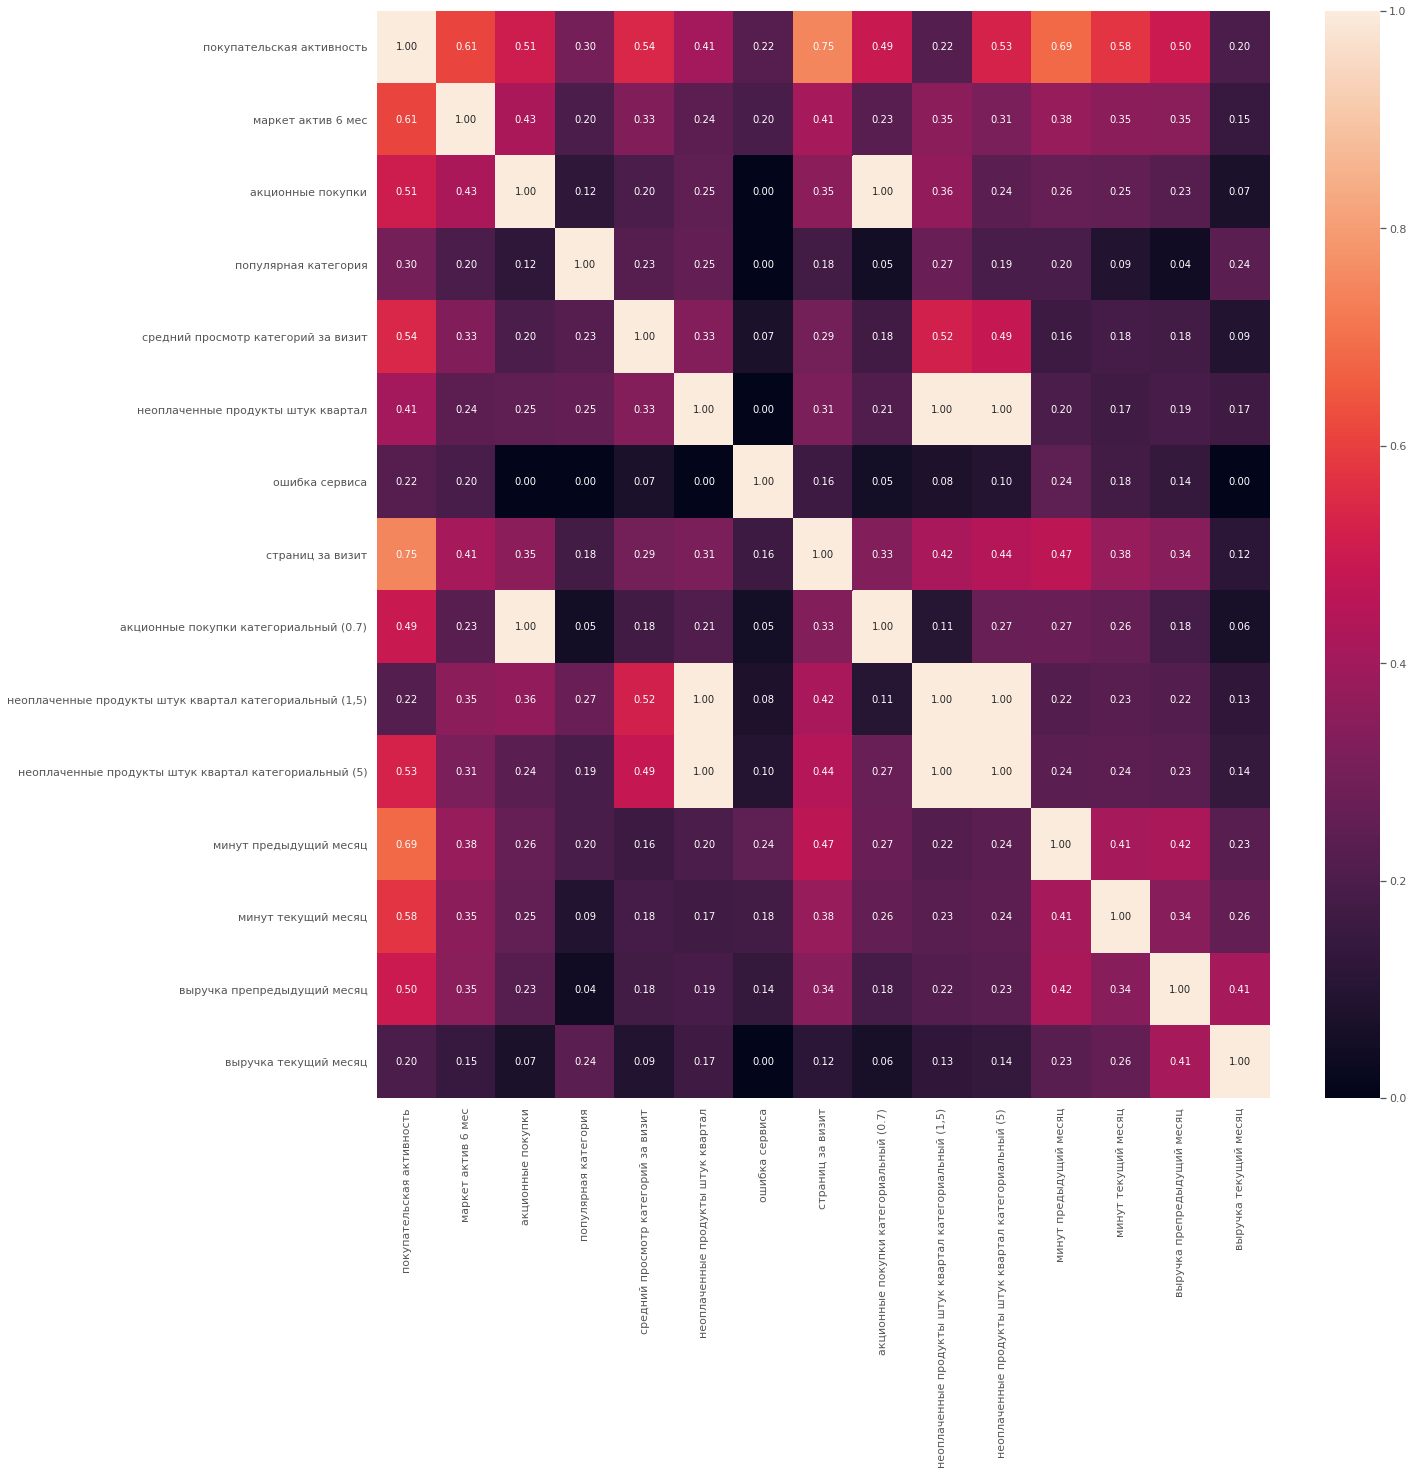

In [84]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    market_corrected_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Видим 4 признака мультиколлинеарности:  

- акционные покупки и акционные покупки категориальный (0.7);
- неоплаченные продукты штук квартал и неоплаченные продукты штук квартал категориальный (1,5);
- неоплаченные продукты штук квартал и неоплаченные продукты штук квартал категориальный (5);
- неоплаченные продукты штук квартал категориальный (1,5) и неоплаченные продукты штук квартал категориальный (5)  

Наименее коррелирующие признаки из этих пар:  

- акционные покупки категориальный (0.7);
- неоплаченные продукты штук квартал категориальный (1,5);
- неоплаченные продукты штук квартал  

Удалим их:

In [85]:
multicol = [
    'акционные покупки категориальный (0.7)',
    'неоплаченные продукты штук квартал категориальный (1,5)',
    'неоплаченные продукты штук квартал'
]

market_corrected_df = market_corrected_df.drop(multicol, axis=1)

Построим матрицу еще раз:

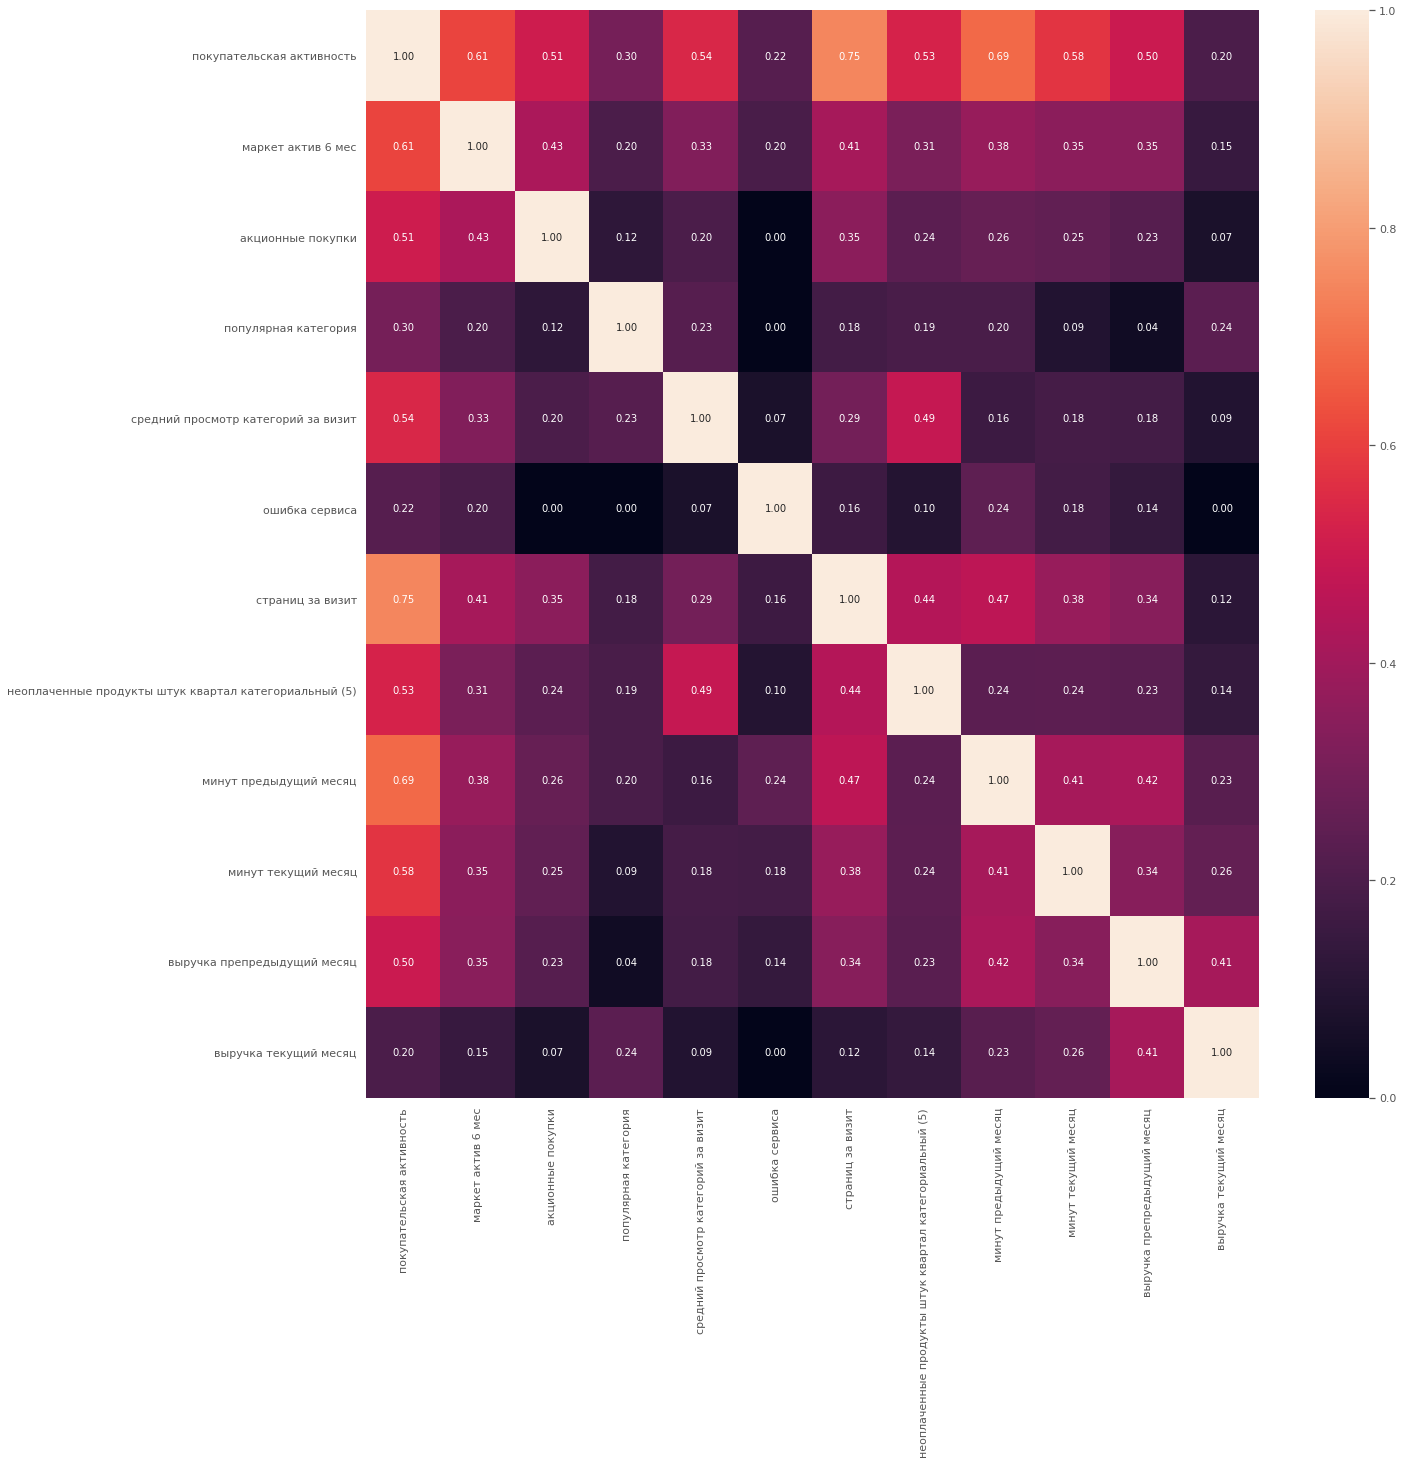

In [86]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    market_corrected_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Выделим пары столбцов с наибольшим коэффициентом корреляции:

- маркет актив 6 мес и страниц за визит;
- маркет актив 6 мес и минут предыдущий месяц;
- акционные покупки и выручка препредыдущий месяц;
- средний просмотр категорий за визит и неоплаченные продукты штук квартал категориальный (5);
- страниц за визит и неоплаченные продукты штук квартал категориальный (5)
- страниц за визит и минут предыдущий месяц;
- страниц за визит и минут текущий месяц;
- минут предыдущий месяц и минут текущий месяц

Также по матрице можно сделать следующий вывод:  


- В препредыдущий месяц, возможно, проходила акция, которая сильно повлияла на выручку;
- Признаки выручка за текущий месяц, а также минут текущий месяц - утечка, так как их можно зафиксировать только по прошествии месяца, для которого требуется предсказание;
- Есть определенная категория пользователей, которая приходит на сайт, долго его листает и кладет в корзину товары, которые в итоге не заказывает. При этом маркетинговые коммуникации с такими пользователями происходят достаточно часто.
- Для корректного обучения модели лучше удалить данные о выручке за препредыдущий месяц, так как нетипичная информация может исказить прогнозы. Кроме того, стоит удалить признак выручка за текущий месяц как утечку.

Остальные колонки лучше оставить как есть

In [87]:
market_corrected_df = market_corrected_df.drop([
    'выручка препредыдущий месяц',
    'выручка текущий месяц',
    'минут текущий месяц'], axis=1)
market_corrected_df.head()

,id,покупательская активность,маркет актив 6 мес,акционные покупки,популярная категория,средний просмотр категорий за визит,ошибка сервиса,страниц за визит,неоплаченные продукты штук квартал категориальный (5),минут предыдущий месяц
1,215349,снизилась,4.4,0.75,товары для детей,4,2,5,низкий,12
2,215350,снизилась,4.9,0.14,домашний текстиль,5,1,5,низкий,8
3,215351,снизилась,3.2,0.99,товары для детей,5,6,4,низкий,11
4,215352,снизилась,5.1,0.94,товары для детей,3,3,2,низкий,8
5,215353,снизилась,3.3,0.26,домашний текстиль,4,1,4,низкий,10


**Вывод**  


В процессе корреляционного анализа из датасета были отброшены признаки, слабо коррелирующие с целевым. Кроме того, была устранена мультиколлинеарность, а также были удалены данные, способные создать помехи.

Более того, было выявлено, что существует категория клиентов, которая приходит на сайт, долго его листает и кладет в корзину товары, которые в итоге не заказывает. При этом маркетинговые коммуникации с такими пользователями происходят достаточно часто.

### Использование пайплайнов

Разделим данные на тренировочную и тестовую выборки:

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    market_corrected_df.drop(['id', 'покупательская активность'], axis=1),
    market_corrected_df['покупательская активность'],
    stratify=market_corrected_df['покупательская активность'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((972, 8), (324, 8))

Разделим признаки на списки:

In [89]:
ohe_columns = [
    'популярная категория'
]

ord_columns = [
    'неоплаченные продукты штук квартал категориальный (5)'
]

num_columns = [
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'ошибка сервиса',
    'страниц за визит',
    'минут предыдущий месяц'
]

Создадим пайплайны для кодировщиков и скейлеров:

In [90]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

In [91]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['низкий', 'высокий']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [92]:
import sklearn
sklearn.__version__

'1.6.1'

In [93]:
num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(2))
])

Создадим общий пайплайн для обработки данных, включающий в себя добавление полиномиальных признаков:

In [94]:
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', num_pipe, num_columns)
], remainder='passthrough')

В данных присутствует дисбаланс классов целевого признака. Для его устранения будем использовать сэмплирование (взвешивание не подойдет, так как обучаться будут в том числе модели, для которых параметр веса не предусмотрен), а если точнее - оверсэмплинг методом SMOTENC (чтобы не обрезать лишних данных и сэмплировать как численные, так и категориальные признаки):

In [95]:
over = SMOTENC(categorical_features=(ohe_columns + ord_columns), random_state=RANDOM_STATE);

In [96]:
pipe_final = Pipeline([
    ('over', over),
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Пайплан готов.

**Создание алгоритма поиска оптимальных гиперпараметров**

Создадим словарь перебора гиперпараметров:

In [97]:
param_grid = [
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([KNeighborsClassifier()]),
        'models__n_neighbors': distributions.IntDistribution(2, 7),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    },
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([DecisionTreeClassifier(random_state=RANDOM_STATE)]),
        'models__max_depth': distributions.IntDistribution(3, 8),
        'models__min_samples_split': distributions.IntDistribution(2, 4),
        'models__min_samples_leaf': distributions.IntDistribution(1, 4),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    },
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([LogisticRegression(random_state=RANDOM_STATE, penalty='elasticnet', solver='saga')]),
        'models__l1_ratio': distributions.CategoricalDistribution([0, 0.2, 0.5, 0.8, 1]),
        'models__C': distributions.IntDistribution(1, 6),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    },
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([SVC(probability=True, random_state=RANDOM_STATE)]),
        'models__kernel': distributions.CategoricalDistribution(['rbf', 'sigmoid', 'poly']),
        'models__degree': distributions.IntDistribution(1, 6),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    }
]

/opt/conda/lib/python3.9/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains KNeighborsClassifier() which is of type KNeighborsClassifier.
  warnings.warn(message)
/opt/conda/lib/python3.9/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains StandardScaler() which is of type StandardScaler.
  warnings.warn(message)
/opt/conda/lib/python3.9/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains MinMaxScaler() which is of type MinMaxScaler.
  warnings.warn(message)
/opt/conda/lib/python3.9/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of No

Настраиваем инструмент поиска лучшей модели. Возьмем OptunaSearchCV для ускорения поиска. Используем метрику roc-auc, так как важны как precision, так и recall, но подбор порога актуален не для всех моделей и важнее получить общее понимание о работе модели:

In [98]:
def get_search(params):
    return OptunaSearchCV(
        pipe_final,
        params,
        cv=5,
        scoring='roc_auc',
        n_trials=40,
        error_score='raise',
        random_state=RANDOM_STATE
    )

In [99]:
search_neighbors = get_search(param_grid[0])
search_tree = get_search(param_grid[1])
search_logistic = get_search(param_grid[2])
search_svc = get_search(param_grid[3])

/tmp/ipykernel_159/4148989887.py:2: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(


**Обучение алгоритма поиска оптимальных гиперпараметров**  


Закодируем целевой признак:

In [100]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Обучим инструмент поиска на данных и посмотрим на лучшие результаты:

In [101]:
search_neighbors.fit(X_train, y_train)

[I 2025-04-03 13:37:45,735] A new study created in memory with name: no-name-2ccbd4bc-d95f-4a9b-a4fd-0c340bdd8842
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.v

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
               param_distributions={'models': CategoricalDistribution(choices=(KNeighborsClassifier(n_neighbors=7),)),
                                    'models__n_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [102]:
search_tree.fit(X_train, y_train)

[I 2025-04-03 13:38:00,755] A new study created in memory with name: no-name-90c57f78-4bd6-4e33-9631-34905302bdb9
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.v

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
                                    'models__min_samples_leaf': IntDistribution(high=4, log=False, low=1, step=1),
                                    'models__min_samples_split': IntDistribution(high=4, log=False, low=2, step=1),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [103]:
search_logistic.fit(X_train, y_train)

[I 2025-04-03 13:38:16,785] A new study created in memory with name: no-name-f8b82549-ea43-4784-ae48-6b2fa70b7235
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/co

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
                   solver='saga'),)),
                                    'models__C': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__l1_ratio': CategoricalDistribution(choices=(0, 0.2, 0.5, 0.8, 1)),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [104]:
search_svc.fit(X_train, y_train)

[I 2025-04-03 13:38:43,431] A new study created in memory with name: no-name-376db95e-593f-4e4c-81b1-cecf191ffcef
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.v

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
                                    'models__degree': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__kernel': CategoricalDistribution(choices=('rbf', 'sigmoid', 'poly')),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [105]:
print('KNeighbors:')
print(search_neighbors.best_score_)
print('Decision Tree:')
print(search_tree.best_score_)
print('Logistic Regression:')
print(search_logistic.best_score_)
print('SVC:')
print(search_svc.best_score_)

KNeighbors:
0.8865994738540193
Decision Tree:
0.8591916734916735
Logistic Regression:
0.9032391457573276
SVC:
0.8975720348447622


In [106]:
#model_neighbors = search_neighbors.best_estimator_
#model_tree = search_tree.best_estimator_
model_logistic = search_logistic.best_estimator_
#model_svc = search_svc.best_estimator_

Оценим метрику на тестовых данных:

In [107]:
def get_roc_auc(model):
    probabilities = model.predict_proba(X_test)
    probabilities_one = probabilities[:, 1]
    return roc_auc_score(y_test, probabilities_one)

In [108]:
#roc_auc_neighbors = get_roc_auc(model_neighbors)
#roc_auc_tree = get_roc_auc(model_tree)
roc_auc_logistic = get_roc_auc(model_logistic)
#roc_auc_svc = get_roc_auc(model_svc)

In [109]:
#print('KNeighbors:')
#print(roc_auc_neighbors)
#print('Decision Tree:')
#print(roc_auc_tree)
print('Logistic Regression:')
print(roc_auc_logistic)
#print('SVC:')
#print(roc_auc_svc)

Logistic Regression:
0.9205193544472758


Для модели логистической регрессии переобучения не наблюдается.  

Узнаем, какие параметры у лучшего пайплайна. В качестве лучшего выбираем папйлайн с логистической регрессией, так как у него наибольшая метрика на тренировочных данных при кросс-валидации:

In [110]:
search_logistic.best_estimator_

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=['популярная категория',
                                               'неоплаченные продукты штук '
                                               'квартал категориальный (5)'],
                         k_neighbors=2, random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='firs...
                                                  ['неоплаченные продукты штук '
                                                   'квартал категориальный '
                                                   '(5)']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['маркет актив 6 мес',
                                                   'акционные покупки',
                                                   'средний просмотр категорий '
                                                   'за визит',
                                                   'ошибка сервиса',
                                                   'страниц за визит',
                                                   'минут предыдущий '
                                                   'месяц'])])),
                ('models',
                 LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

**Вывод**  


Достигнув метрики roc-auc в 0.90 на тренировочных и 0.92 на тестовых данных, лучше всех себя показал пайплайн со следующими параметрами:

- k_neighbors для SMOTENC: 5;
- модель LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet', random_state=42, solver='saga');
- MinMaxScaler.

### Анализ важности признаков

**Проверка permutation importance**  


Для начала предобработаем данные для анализа:

In [111]:
best_pipeline = search_logistic.best_estimator_
best_pipeline

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=['популярная категория',
                                               'неоплаченные продукты штук '
                                               'квартал категориальный (5)'],
                         k_neighbors=2, random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='firs...
                                                  ['неоплаченные продукты штук '
                                                   'квартал категориальный '
                                                   '(5)']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['маркет актив 6 мес',
                                                   'акционные покупки',
                                                   'средний просмотр категорий '
                                                   'за визит',
                                                   'ошибка сервиса',
                                                   'страниц за визит',
                                                   'минут предыдущий '
                                                   'месяц'])])),
                ('models',
                 LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

In [112]:
preprocessor = best_pipeline['preprocessor']
X_test_preprocessed = preprocessor.transform(X_test)

# Обучим модель на тестовых данных:      
model = LogisticRegression(C=5, l1_ratio=1, penalty='elasticnet', random_state=RANDOM_STATE, solver='saga')
model.fit(X_test_preprocessed, y_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5, l1_ratio=1, penalty='elasticnet', random_state=42,
                   solver='saga')

Построим график важности признаков:

In [113]:
features_names = (
    list(preprocessor['ohe'].get_feature_names_out())
    + list(preprocessor['ord'].get_feature_names_out())
    + list(preprocessor['num']['poly'].get_feature_names_out(num_columns))
)

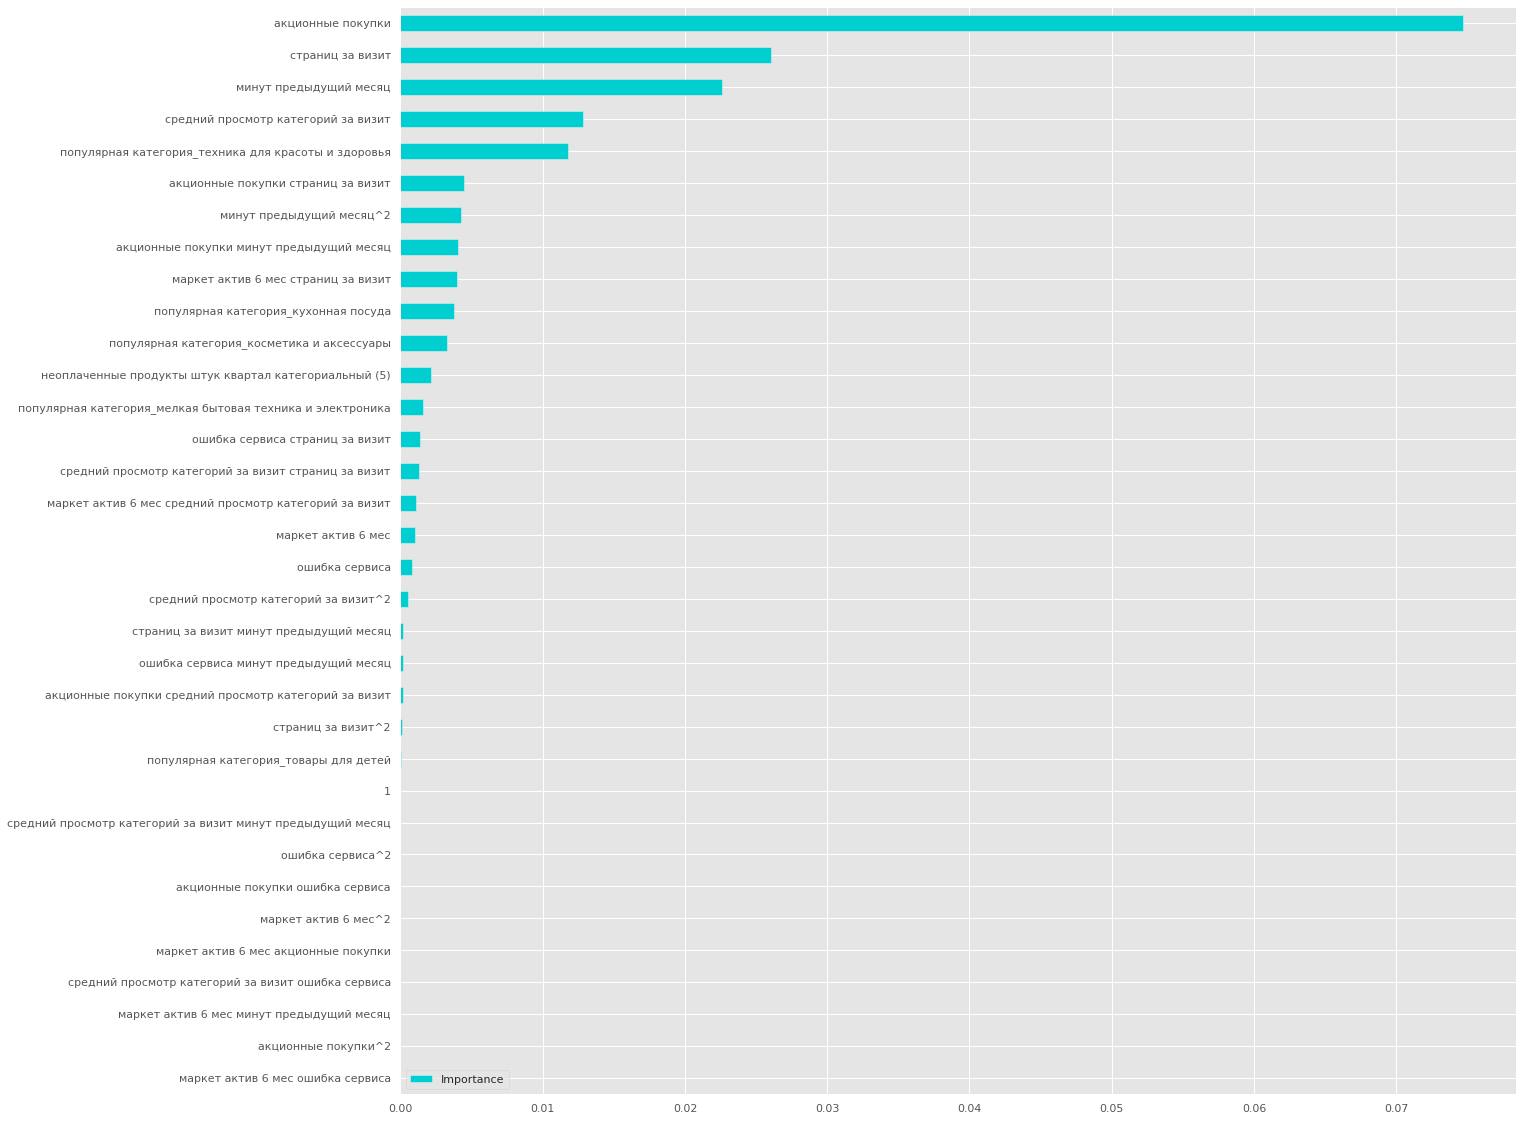

In [114]:
result = permutation_importance(model, X_test_preprocessed, y_test, scoring='roc_auc')

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': np.abs(result['importances_mean'])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(20, 20), ylabel='', xlabel='')
plt.show()

**Вывод:**

- на активность пользователей значительно влияет наличие акций;
- на активность пользователей значительно влияет время, проведенное на сайте;
- на активность пользователей значительно влияет количество страниц, просмотренных пользователем за визит;
- количество категорий, которые смотрит пользователь, также влияет на его активность;
- количество неоплаченных товаров в корзине влияет на поведение пользователей;
- наиболее активны те пользователи, которые наиболее часто покупают технику и товары для красоты/здоровья.

**Анализ с помощью метода SHAP**  


Для начала оценим общую значимость признаков:

In [115]:
data = pd.DataFrame(X_test_preprocessed, columns=features_names)
explainer = shap.KernelExplainer(model.predict, data)
shap_values = explainer(X_test_preprocessed)

Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/324 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/shap/plots/_beeswarm.py:497: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(range(len(feature_inds)), list(reversed(yticklabels)), fontsize=13)


TypeError: set_ticks() got an unexpected keyword argument 'fontsize'

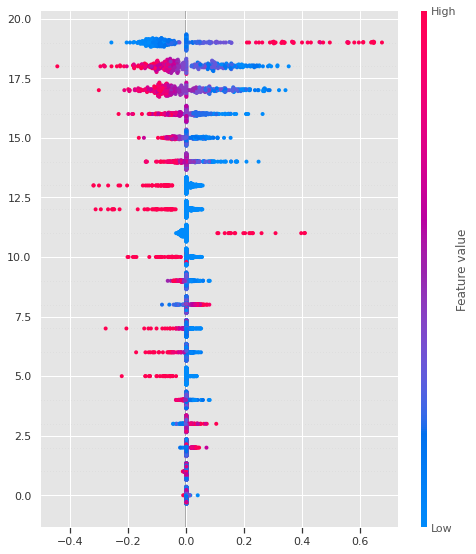

In [116]:
#рассмотрим, как признаки влияют на каждое предсказание модели
shap.plots.beeswarm(shap_values, max_display=20)

Сравнивая диаграмму beeswarm с графиком permutation importance, можно увидеть, что в общем признаки располагаются примерно в том же порядке за редкими исключениями (пример: популярная категория_мелкая бытовая техника и электроника).

Можно заметить следующее:

- признак акционные покупки отрицательно влияет на активность. Возможно, это говорит о том, что пользователи, пришедшие по рекламе и ожидающие скидки, как правило, теряют интерес, когда акция заканчивается. Тем не менее, квадрат этого признака влияет на активность положительно. Возможно, это уже сегмент пользователей, которые попали на акцию не через рекламу, а через просмотр непосредственно сайта;
- признак страниц за визит положительно влияет на активность пользователей. Это означает, что пользователи, которые просматривают больше страниц, склонны остаться на сайте;
- признак минут предыдущий месяц, а также его квадрат положительно влияют на активность пользователей. Это означает, что время, проведенное на сайте, оказывает положительное влияние на активность пользователя;
- признак маркет актив 6 мес положительно влияет на активность пользователей. Это означает, что активные в прошлом пользователи склонны оставаться активными;
- самые способствующие активности категории товаров - техника и товары для красоты/здоровья;
- высокое количество неоплаченных товаров негативно сказывается на активности пользователя.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Экспертный вывод по графикам! Не просто красивые картинки построены, но описаны те моменты, которые дата-сайентист видит в них!
</div>

**Отбор признаков**  


Напишем функцию для вывода метрики ROC-AUC на тренировочных и тестовых данных для разных значений k в селекторе SelectKBest:

In [ ]:
def roc_auc_scores(k, X_train, X_test, y_train, y_test):
    selector_pipe = Pipeline([
        ('over', best_pipeline['over']),
        ('preprocessor', best_pipeline['preprocessor']),
        ('selector', SelectKBest(f_classif, k=k+1)),
        ('models', best_pipeline['models'])
    ])

    selector_pipe.fit(X_train, y_train)
    roc_auc_train = roc_auc_score(y_train, selector_pipe.predict_proba(X_train)[:,1])
    roc_auc_test = roc_auc_score(y_test, selector_pipe.predict_proba(X_test)[:,1])
    return roc_auc_train, roc_auc_test

In [ ]:
for i in range(0, len(features_names)):
    train_score, test_score = roc_auc_scores(i, X_train, X_test, y_train, y_test)
    print(f'k = {i + 1}; train score: {round(train_score, 4)}; test score: {round(test_score, 4)}')

до применения селектора метрика составляла:

0.9032 для тренировочных данных;  


0.9205 для тестовых.  


Заметим, что без потери качества предсказания на тренировочных данных можно убрать два признака.

Выведем признаки, которые показали лучшие результаты:

In [ ]:
best_selector_pipeline = Pipeline([
        ('over', best_pipeline['over']),
        ('preprocessor', best_pipeline['preprocessor']),
        ('selector', SelectKBest(f_classif, k=32)),
        ('models', best_pipeline['models'])
    ])
best_selector_pipeline.fit(X_train, y_train)

In [ ]:
best_selector_pipeline['selector'].get_feature_names_out()

In [ ]:
selected_features=features_names[:6] + features_names[7:34]
selected_features

Заключительные показатели:

In [ ]:
score_train = roc_auc_score(y_train, best_selector_pipeline.predict_proba(X_train)[:,1])
score_test = roc_auc_score(y_test, best_selector_pipeline.predict_proba(X_test)[:,1])

print(f'Train score: {score_train}')
print(f'Test score: {score_test}')

**Вывод**  


Можно заметить следующее:

- признак акционные покупки отрицательно влияет на активность. Возможно, это говорит о том, что пользователи, пришедшие по рекламе и ожидающие скидки, как правило, теряют интерес, когда акция заканчивается. Тем не менее, квадрат этого признака влияет на активность положительно. Возможно, это уже сегмент пользователей, которые попали на акцию не через рекламу, а через просмотр непосредственно сайта;
- признак страниц за визит положительно влияет на активность пользователей. Это означает, что пользователи, которые просматривают больше страниц, склонны остаться на сайте;
- признак минут предыдущий месяц, а также его квадрат положительно влияют на активность пользователей. Это означает, что время, проведенное на сайте, оказывает положительное влияние на активность пользователя;
- признак маркет актив 6 мес положительно влияет на активность пользователей. Это означает, что активные в прошлом пользователи склонны оставаться активными;
- самые способствующие активности категории товаров - техника и товары для красоты/здоровья;
- высокое количество неоплаченных товаров негативно сказывается на активности пользователя.  


Для увеличения общей активности пользователей можно порекомендовать следующее:

- вкладывать наибольшие ресурсы в развитие рекомендательной системы (чтобы пользователи, которые просто листают сайт, начали делать покупки);
- создать систему скидок и акций для постоянных пользователей. Это позволит удержать любителей скидок;
- попробовать сделать упор на женскую аудиторию (так как активность пользователей в категориях, связанных с красотой, здоровьем и мелкой бытовой техникой, достаточно высока).

### Сегментация покупателей

**Выполнение сегментации**  



Рассмотрим, какие признаки влияют на прибыльность клиентов для компании. Для этого объединим датасеты и построим матрицу корреляции:

In [ ]:
profit_df = market_corrected_df.merge(money_df, on='id')
print(market_corrected_df.shape)
print(money_df.shape)
print(profit_df.shape)

In [ ]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    profit_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Можно увидеть, что на прибыльность влияют признаки ошибка сервиса, средний просмотр категорий за визит и популярная категория.

In [ ]:
series = best_selector_pipeline.predict_proba(
    profit_df.drop(
        ['прибыль', 'id', 'покупательская активность'], axis=1
    )
)[:,1]

profit_df['вероятность снижения активности'] = series

In [ ]:
profit_df.plot.scatter(x='вероятность снижения активности',
                       y='прибыль',
                       title='Зависимость прибыльности клиента\nот вероятности снижения активности',
                       xlabel='Покупательская активность',
                       ylabel='Прибыльность')
plt.show()

Проанализируем сегмент покупателей, активность которых, вероятно, снизится, и которые при этом принесли бы ощутимую прибыль. Проведем границу разделения вероятностей на отметке в 0.6, а границу для прибыли на отметке в 3:

In [ ]:
warning_df = profit_df[(profit_df['вероятность снижения активности'] >= 0.6) & (profit_df['прибыль'] >= 3)]
safe_df = profit_df[~((profit_df['вероятность снижения активности'] >= 0.6) & (profit_df['прибыль'] >= 3))]

**Анализ внутри сегмента**  


Посмотрим на корреляционные матрицы целевых и нецелевых пользователей:

In [ ]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    warning_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Можно заметить, что на покупательскую активность таких пользователей, сильнее влияет количество страниц, которое они просматривают, а также количество времени, проведенного на сайте. Построим графики для этих признаков и остальных:

In [ ]:
def show_scatter(data, ax, col_name, color):
    data.plot.scatter(ax=ax,
                       x=col_name,
                       y='вероятность снижения активности',
                       color=color,
                       title=f'Зависимость вероятности снижения активности\nцелевого пользователя от {col_name}',
                       xlabel=col_name,
                       ylabel='Покупательская активность')
def show_bar(data, ax, col_name, color):
    pivot = data.pivot_table(index=col_name, values='вероятность снижения активности', aggfunc='median')
    pivot.columns = ['median']
    pivot.sort_values(by='median', ascending=True, inplace=True)
    pivot.plot.barh(ax=ax,
                    color=color,
                    title=f'Зависимость вероятности снижения активности\nцелевого пользователя от {col_name}',
                    xlabel='',
                    ylabel='Покупательская активность')

In [ ]:
num_cols = [
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'страниц за визит',
    'ошибка сервиса',
    'минут предыдущий месяц',
]

cat_cols = [
    'популярная категория',
    'неоплаченные продукты штук квартал категориальный (5)'
]

fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(20, 20))

for i in range(0, 6):
    show_scatter(warning_df, axes[i, 0], num_cols[i], 'red')
    show_scatter(safe_df, axes[i, 1], num_cols[i], 'green')

for i in range(6, 8):
    show_bar(warning_df, axes[i, 0], cat_cols[i - len(num_cols)], 'red')
    show_bar(safe_df, axes[i, 1], cat_cols[i - len(num_cols)], 'green')

plt.subplots_adjust(right=2, top=3)
plt.show()

**Вывод**  


По результатам анализа по сегментам можно предложить бизнесу следующее:

- стараться проводить маркетинговые взаимодействия ненавязчиво;
- не делать упор на акции. Можно сказать, что они расширяют охват, но портят качество аудитории;
- иногда провоцировать пользователя переходить в другие категории;
- вкладывать наибольшие ресурсы в развитие рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее пролистывание;
- необходимо стараться уменьшать количество ошибок на сайте;
- сделать упор на товары для дома (обобщение для ходовых категорий среди целевых пользователей).

### Итоговый вывод

**Описание задачи**

Для выполнения задачи необходимо было пройти следуюшие этапы:

- промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень»;

собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте;
- построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;
- включить в исследование дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;
- используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

Целью исследования является сегментация покупателей и разработка персонализированных предложений для них.

Данные шаги пройдены, а в качестве результатов исследования подготовлены рекомендации для бизнеса.

Поиск лучшей модели

В процессе поиска лучшей модели с помощью инструмента OptunaSearchCV были обучены следующие модели с разными параметрами:

- KNeighborsClassifier();
- DecisionTreeClassifier();
- LogisticRegression();
- SVC().  


Кроме того, были перебраны различные методы подготовки данных к обучению, насыщения их синтетикой и отбора признаков.

Лучшим пайплайном оказался следующий:

In [ ]:
best_selector_pipeline

Его метрика качества (ROC-AUC) оказалась следующей:

- 0.91 на тренировочных данных;
- 0.92 на тестовых.  


Выводы и рекомендации

При помощи анализа данных методом SHAP были составлены следующие общие рекомендации:

- вкладывать наибольшие ресурсы в развитие рекомендательной системы (чтобы пользователи, которые просто листают сайт, начали делать покупки);
- создать систему скидок и акций для постоянных пользователей. Это позволит удержать любителей скидок;
- попробовать сделать упор на женскую аудиторию (так как активность пользователей в категориях, связанных с красотой, здоровьем и мелкой бытовой техникой, достаточно высока).  


Для анализа был выбран сегмент, в котором пользователи имеют наибольшую вероятность снизить активность, и при этом имеют наибольшую потенциальную прибыль.

По результатам анализа по сегментам рекомендации были скорректированы следующим образом:

- стараться проводить маркетинговые взаимодействия ненавязчиво;
- не делать упор на акции. Можно сказать, что они расширяют охват, но портят качество аудитории;
- иногда провоцировать пользователя переходить в другие категории;
- вкладывать наибольшие ресурсы в развитие рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее пролистывание;
- необходимо стараться уменьшать количество ошибок на сайте;
- сделать упор на товары для дома (обобщение для ходовых категорий среди целевых пользователей).